In [1]:
import os
print(os.getcwd())

C:\Users\dkast\ANA 500\Data


In [170]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [3]:
# load the data

cat = pd.read_csv('data_categorical.csv')
numeric = pd.read_csv('data_numeric.csv')
ordinal = pd.read_csv('data_ordinal.csv')

In [4]:
def load_data(data_folder='.'):
    """
    Loads categorical, numeric, and ordinal datasets from a specified folder.
    
    Parameters:
        data_folder (str): Relative path to the folder containing the CSV files.
        
    Returns:
        cat (DataFrame): Categorical data
        numeric (DataFrame): Numeric data
        ordinal (DataFrame): Ordinal data
    """
    base_path = os.path.abspath(data_folder)
    
    cat = pd.read_csv(os.path.join(base_path, 'data_categorical.csv'))
    numeric = pd.read_csv(os.path.join(base_path, 'data_numeric.csv'))
    ordinal = pd.read_csv(os.path.join(base_path, 'data_ordinal.csv'))
    
    return cat, numeric, ordinal

cat, numeric, ordinal = load_data()

# Quick Inspection
print(f"Categorical shape: {cat.shape}")
print(f"Numeric shape: {numeric.shape}")
print(f"Ordinal shape: {ordinal.shape}")

# Optional: Preview first few rows
show_preview = True
if show_preview:
    display(cat.head())
    display(numeric.head())
    display(ordinal.head())

Categorical shape: (5000, 23)
Numeric shape: (5000, 6)
Ordinal shape: (5000, 11)


PERSONID  DIABETE3  _RACE  MSCODE  FLUSHOT6  EMPLOY1  SEX  MARITAL  \
0    355467       3.0    2.0     NaN       2.0      1.0  1.0      6.0   
1    117235       3.0    1.0     5.0       1.0      7.0  2.0      3.0   
2    268614       3.0    1.0     1.0       1.0      7.0  2.0      3.0   
3    332821       3.0    4.0     NaN       2.0      1.0  1.0      1.0   
4    348522       3.0    1.0     NaN       1.0      1.0  2.0      1.0   

   CVDCRHD4  HLTHCVR1  ...  ADDEPEV2  RENTHOM1  EXERANY2  BLIND  DECIDE  \
0       2.0       7.0  ...       2.0       2.0       1.0    2.0     2.0   
1       2.0       2.0  ...       2.0       1.0       2.0    2.0     2.0   
2       2.0       3.0  ...       2.0       1.0       1.0    2.0     2.0   
3       2.0       NaN  ...       2.0       2.0       1.0    2.0     2.0   
4       2.0       1.0  ...       2.0       1.0       1.0    2.0     2.0   

   HLTHPLN1  DIABETE3.1  _STATE  ASTHMA3  MARITAL.1  
0       1.0         3.0    44.0      2.0        6.0  
1       1.0         3.0    19.0      2.0        3.0  
2       1.0         3.0    33.0      2.0        3.0  
3       1.0         3.0    40.0      2.0        1.0  
4       1.0         3.0    42.0      2.0        1.0  

[5 rows x 23 columns]

PERSONID  DIABETE3  NUMADULT  CHILDREN  WEIGHT2  DRVISITS
0    355467       3.0       NaN       2.0    180.0       6.0
1    117235       3.0       1.0      88.0    160.0       2.0
2    268614       3.0       1.0      88.0    120.0       2.0
3    332821       3.0       NaN      88.0    160.0       NaN
4    348522       3.0       NaN      88.0    129.0       1.0

PERSONID  DIABETE3  GENHLTH  _AGEG5YR  _BMI5CAT  CHECKUP1  INCOME2  \
0    355467       3.0      1.0       6.0       3.0       3.0      3.0   
1    117235       3.0      1.0      10.0       3.0       1.0      4.0   
2    268614       3.0      2.0      12.0       2.0       1.0      3.0   
3    332821       3.0      2.0       3.0       2.0       1.0      8.0   
4    348522       3.0      2.0       9.0       2.0       2.0      8.0   

   _EDUCAG  SLEPTIM1  MENTHLTH  _SMOKER3  
0      3.0       6.0      88.0       4.0  
1      2.0       7.0      88.0       4.0  
2      2.0       8.0       2.0       4.0  
3      4.0       6.0      15.0       3.0  
4      3.0       7.0      88.0       4.0

In [5]:
cat.head()

PERSONID  DIABETE3  _RACE  MSCODE  FLUSHOT6  EMPLOY1  SEX  MARITAL  \
0    355467       3.0    2.0     NaN       2.0      1.0  1.0      6.0   
1    117235       3.0    1.0     5.0       1.0      7.0  2.0      3.0   
2    268614       3.0    1.0     1.0       1.0      7.0  2.0      3.0   
3    332821       3.0    4.0     NaN       2.0      1.0  1.0      1.0   
4    348522       3.0    1.0     NaN       1.0      1.0  2.0      1.0   

   CVDCRHD4  HLTHCVR1  ...  ADDEPEV2  RENTHOM1  EXERANY2  BLIND  DECIDE  \
0       2.0       7.0  ...       2.0       2.0       1.0    2.0     2.0   
1       2.0       2.0  ...       2.0       1.0       2.0    2.0     2.0   
2       2.0       3.0  ...       2.0       1.0       1.0    2.0     2.0   
3       2.0       NaN  ...       2.0       2.0       1.0    2.0     2.0   
4       2.0       1.0  ...       2.0       1.0       1.0    2.0     2.0   

   HLTHPLN1  DIABETE3.1  _STATE  ASTHMA3  MARITAL.1  
0       1.0         3.0    44.0      2.0        6.0  
1       1.0         3.0    19.0      2.0        3.0  
2       1.0         3.0    33.0      2.0        3.0  
3       1.0         3.0    40.0      2.0        1.0  
4       1.0         3.0    42.0      2.0        1.0  

[5 rows x 23 columns]

In [6]:
numeric.head()

PERSONID  DIABETE3  NUMADULT  CHILDREN  WEIGHT2  DRVISITS
0    355467       3.0       NaN       2.0    180.0       6.0
1    117235       3.0       1.0      88.0    160.0       2.0
2    268614       3.0       1.0      88.0    120.0       2.0
3    332821       3.0       NaN      88.0    160.0       NaN
4    348522       3.0       NaN      88.0    129.0       1.0

In [7]:
ordinal.head()

PERSONID  DIABETE3  GENHLTH  _AGEG5YR  _BMI5CAT  CHECKUP1  INCOME2  \
0    355467       3.0      1.0       6.0       3.0       3.0      3.0   
1    117235       3.0      1.0      10.0       3.0       1.0      4.0   
2    268614       3.0      2.0      12.0       2.0       1.0      3.0   
3    332821       3.0      2.0       3.0       2.0       1.0      8.0   
4    348522       3.0      2.0       9.0       2.0       2.0      8.0   

   _EDUCAG  SLEPTIM1  MENTHLTH  _SMOKER3  
0      3.0       6.0      88.0       4.0  
1      2.0       7.0      88.0       4.0  
2      2.0       8.0       2.0       4.0  
3      4.0       6.0      15.0       3.0  
4      3.0       7.0      88.0       4.0

In [8]:
print ("Shape of Catetgorical Data:", cat.shape)
cat.info()

Shape of Catetgorical Data: (5000, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PERSONID    5000 non-null   int64  
 1   DIABETE3    5000 non-null   float64
 2   _RACE       4997 non-null   float64
 3   MSCODE      3187 non-null   float64
 4   FLUSHOT6    4762 non-null   float64
 5   EMPLOY1     4981 non-null   float64
 6   SEX         5000 non-null   float64
 7   MARITAL     4990 non-null   float64
 8   CVDCRHD4    5000 non-null   float64
 9   HLTHCVR1    3318 non-null   float64
 10  CHCKIDNY    5000 non-null   float64
 11  USEEQUIP    4837 non-null   float64
 12  _TOTINDA    5000 non-null   float64
 13  ADDEPEV2    5000 non-null   float64
 14  RENTHOM1    4898 non-null   float64
 15  EXERANY2    5000 non-null   float64
 16  BLIND       4830 non-null   float64
 17  DECIDE      4829 non-null   float64
 18  HLTHPLN1    5000 non-null   f

In [9]:
print ("Shape of Numeric Data:", numeric.shape)
numeric.info()

Shape of Numeric Data: (5000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   NUMADULT  3240 non-null   float64
 3   CHILDREN  4988 non-null   float64
 4   WEIGHT2   4950 non-null   float64
 5   DRVISITS  3567 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 234.5 KB


In [10]:
print ("Shape of Ordinal Data:", ordinal.shape)
ordinal.info()

Shape of Ordinal Data: (5000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PERSONID  5000 non-null   int64  
 1   DIABETE3  5000 non-null   float64
 2   GENHLTH   5000 non-null   float64
 3   _AGEG5YR  5000 non-null   float64
 4   _BMI5CAT  4681 non-null   float64
 5   CHECKUP1  5000 non-null   float64
 6   INCOME2   4962 non-null   float64
 7   _EDUCAG   5000 non-null   float64
 8   SLEPTIM1  5000 non-null   float64
 9   MENTHLTH  5000 non-null   float64
 10  _SMOKER3  5000 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 429.8 KB


In [11]:
#identify just the columns wiht missing data

cat.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)

MSCODE       1813
HLTHCVR1     1682
FLUSHOT6      238
DECIDE        171
BLIND         170
USEEQUIP      163
RENTHOM1      102
EMPLOY1        19
MARITAL        10
MARITAL.1      10
_RACE           3
dtype: int64

In [12]:
numeric.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)

NUMADULT    1760
DRVISITS    1433
WEIGHT2       50
CHILDREN      12
dtype: int64

In [13]:
ordinal.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)

_BMI5CAT    319
INCOME2      38
dtype: int64

In [14]:
# Merge all three on PERSONID

combined = cat.merge(numeric, on='PERSONID') \
              .merge(ordinal, on='PERSONID')

In [15]:
combined.shape

(5000, 38)

In [16]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PERSONID    5000 non-null   int64  
 1   DIABETE3_x  5000 non-null   float64
 2   _RACE       4997 non-null   float64
 3   MSCODE      3187 non-null   float64
 4   FLUSHOT6    4762 non-null   float64
 5   EMPLOY1     4981 non-null   float64
 6   SEX         5000 non-null   float64
 7   MARITAL     4990 non-null   float64
 8   CVDCRHD4    5000 non-null   float64
 9   HLTHCVR1    3318 non-null   float64
 10  CHCKIDNY    5000 non-null   float64
 11  USEEQUIP    4837 non-null   float64
 12  _TOTINDA    5000 non-null   float64
 13  ADDEPEV2    5000 non-null   float64
 14  RENTHOM1    4898 non-null   float64
 15  EXERANY2    5000 non-null   float64
 16  BLIND       4830 non-null   float64
 17  DECIDE      4829 non-null   float64
 18  HLTHPLN1    5000 non-null   float64
 19  DIABETE3.1  5000 non-null  

In [17]:
missing_summary = combined.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)
print(missing_summary)

MSCODE       1813
NUMADULT     1760
HLTHCVR1     1682
DRVISITS     1433
_BMI5CAT      319
FLUSHOT6      238
DECIDE        171
BLIND         170
USEEQUIP      163
RENTHOM1      102
WEIGHT2        50
INCOME2        38
EMPLOY1        19
CHILDREN       12
MARITAL.1      10
MARITAL        10
_RACE           3
dtype: int64


In [18]:
# Check if all columns exist
combined[['DIABETE3', 'DIABETE3_x', 'DIABETE3_y', 'DIABETE3.1']].info()

# Compare value distributions
for col in ['DIABETE3', 'DIABETE3_x', 'DIABETE3_y', 'DIABETE3.1']:
    print(f"\n{col} value counts:")
    print(combined[col].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DIABETE3    5000 non-null   float64
 1   DIABETE3_x  5000 non-null   float64
 2   DIABETE3_y  5000 non-null   float64
 3   DIABETE3.1  5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB

DIABETE3 value counts:
DIABETE3
3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: count, dtype: int64

DIABETE3_x value counts:
DIABETE3_x
3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: count, dtype: int64

DIABETE3_y value counts:
DIABETE3_y
3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: count, dtype: int64

DIABETE3.1 value counts:
DIABETE3.1
3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: count, dtype: int64


In [19]:
combined.drop(columns=['DIABETE3_x', 'DIABETE3_y', 'DIABETE3.1'], inplace=True)

### Removed the duplicate diabetes variables

I was able to identify that the 4 diabetes variables are the same so I removed the 3 that did not match the code book. 

In [20]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERSONID   5000 non-null   int64  
 1   _RACE      4997 non-null   float64
 2   MSCODE     3187 non-null   float64
 3   FLUSHOT6   4762 non-null   float64
 4   EMPLOY1    4981 non-null   float64
 5   SEX        5000 non-null   float64
 6   MARITAL    4990 non-null   float64
 7   CVDCRHD4   5000 non-null   float64
 8   HLTHCVR1   3318 non-null   float64
 9   CHCKIDNY   5000 non-null   float64
 10  USEEQUIP   4837 non-null   float64
 11  _TOTINDA   5000 non-null   float64
 12  ADDEPEV2   5000 non-null   float64
 13  RENTHOM1   4898 non-null   float64
 14  EXERANY2   5000 non-null   float64
 15  BLIND      4830 non-null   float64
 16  DECIDE     4829 non-null   float64
 17  HLTHPLN1   5000 non-null   float64
 18  _STATE     5000 non-null   float64
 19  ASTHMA3    5000 non-null   float64
 20  MARITAL.

In [21]:
# Focus on the MSCODE for now there is 36 % missing and the code book says missing could be an answer. 

missing_by_state = combined.loc[combined['MSCODE'].isna(), '_STATE'].value_counts()
print(missing_by_state)

_STATE
31.0    110
49.0     88
27.0     82
48.0     59
20.0     59
72.0     52
26.0     51
15.0     50
8.0      50
37.0     47
42.0     46
6.0      45
35.0     42
1.0      39
50.0     39
25.0     38
40.0     38
53.0     37
4.0      37
45.0     37
51.0     36
46.0     35
66.0     34
34.0     33
18.0     32
19.0     29
39.0     29
12.0     29
33.0     28
55.0     28
41.0     27
9.0      27
22.0     25
29.0     25
54.0     24
38.0     23
21.0     23
13.0     23
36.0     23
44.0     22
10.0     22
23.0     21
17.0     20
16.0     19
47.0     18
28.0     18
24.0     18
2.0      17
5.0      17
30.0     16
11.0     10
32.0     10
56.0      6
Name: count, dtype: int64


In [22]:
# Step 1: Build a state-to-mode map from non-missing MSCODE values
state_mode_map = combined.dropna(subset=['MSCODE']) \
    .groupby('_STATE')['MSCODE'].agg(lambda x: x.mode().iloc[0])

national_mode = combined['MSCODE'].mode()[0]

# Step 2: Fill using state-wise mode, fallback to national mode
combined['MSCODE_imputed'] = combined['MSCODE']
combined.loc[combined['MSCODE'].isna(), 'MSCODE_imputed'] = \
    combined.loc[combined['MSCODE'].isna(), '_STATE'].map(state_mode_map).fillna(national_mode)


In [23]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PERSONID        5000 non-null   int64  
 1   _RACE           4997 non-null   float64
 2   MSCODE          3187 non-null   float64
 3   FLUSHOT6        4762 non-null   float64
 4   EMPLOY1         4981 non-null   float64
 5   SEX             5000 non-null   float64
 6   MARITAL         4990 non-null   float64
 7   CVDCRHD4        5000 non-null   float64
 8   HLTHCVR1        3318 non-null   float64
 9   CHCKIDNY        5000 non-null   float64
 10  USEEQUIP        4837 non-null   float64
 11  _TOTINDA        5000 non-null   float64
 12  ADDEPEV2        5000 non-null   float64
 13  RENTHOM1        4898 non-null   float64
 14  EXERANY2        5000 non-null   float64
 15  BLIND           4830 non-null   float64
 16  DECIDE          4829 non-null   float64
 17  HLTHPLN1        5000 non-null   f

In [24]:
missing_summary = combined.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)
print(missing_summary)

MSCODE       1813
NUMADULT     1760
HLTHCVR1     1682
DRVISITS     1433
_BMI5CAT      319
FLUSHOT6      238
DECIDE        171
BLIND         170
USEEQUIP      163
RENTHOM1      102
WEIGHT2        50
INCOME2        38
EMPLOY1        19
CHILDREN       12
MARITAL.1      10
MARITAL        10
_RACE           3
dtype: int64


In [25]:
#impute number of adults using knn and the 'CHILDREN', 'INCOME2', 'RENTHOM1', 'MSCODE_imputed', '_STATE' variables

knn_features = ['CHILDREN', 'INCOME2', 'RENTHOM1', 'MSCODE_imputed', '_STATE']
knn_data = combined[knn_features + ['NUMADULT']]

knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_data)

combined['NUMADULT_imputed'] = imputed_array[:, -1].round()

In [26]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PERSONID          5000 non-null   int64  
 1   _RACE             4997 non-null   float64
 2   MSCODE            3187 non-null   float64
 3   FLUSHOT6          4762 non-null   float64
 4   EMPLOY1           4981 non-null   float64
 5   SEX               5000 non-null   float64
 6   MARITAL           4990 non-null   float64
 7   CVDCRHD4          5000 non-null   float64
 8   HLTHCVR1          3318 non-null   float64
 9   CHCKIDNY          5000 non-null   float64
 10  USEEQUIP          4837 non-null   float64
 11  _TOTINDA          5000 non-null   float64
 12  ADDEPEV2          5000 non-null   float64
 13  RENTHOM1          4898 non-null   float64
 14  EXERANY2          5000 non-null   float64
 15  BLIND             4830 non-null   float64
 16  DECIDE            4829 non-null   float64


In [27]:
# Impute HLTHCVR1

#binary indicator for coverage

combined['hlth_coverage'] = combined['HLTHPLN1'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})

In [28]:
# Impute 'None' for those who report no coverage
combined.loc[
    (combined['HLTHCVR1'].isna()) & (combined['hlth_coverage'] == 0),
    'HLTHCVR1'
] = 8

In [29]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PERSONID          5000 non-null   int64  
 1   _RACE             4997 non-null   float64
 2   MSCODE            3187 non-null   float64
 3   FLUSHOT6          4762 non-null   float64
 4   EMPLOY1           4981 non-null   float64
 5   SEX               5000 non-null   float64
 6   MARITAL           4990 non-null   float64
 7   CVDCRHD4          5000 non-null   float64
 8   HLTHCVR1          3677 non-null   float64
 9   CHCKIDNY          5000 non-null   float64
 10  USEEQUIP          4837 non-null   float64
 11  _TOTINDA          5000 non-null   float64
 12  ADDEPEV2          5000 non-null   float64
 13  RENTHOM1          4898 non-null   float64
 14  EXERANY2          5000 non-null   float64
 15  BLIND             4830 non-null   float64
 16  DECIDE            4829 non-null   float64


In [30]:
knn_features = ['_AGEG5YR', 'INCOME2', '_EDUCAG', 'MSCODE_imputed', 'hlth_coverage']
knn_data = combined[knn_features + ['HLTHCVR1']]

knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_data)

combined['HLTHCVR1_imputed'] = imputed_array[:, -1].round()

In [31]:
#impute DRVISITS

# Step 1: Build median DRVISITS by CHECKUP1 category
visit_map = combined.groupby('CHECKUP1')['DRVISITS'].median()

# Step 2: Impute missing DRVISITS using CHECKUP1
combined['DRVISITS_imputed'] = combined['DRVISITS']
combined.loc[combined['DRVISITS'].isna(), 'DRVISITS_imputed'] = \
    combined.loc[combined['DRVISITS'].isna(), 'CHECKUP1'].map(visit_map)

In [32]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PERSONID          5000 non-null   int64  
 1   _RACE             4997 non-null   float64
 2   MSCODE            3187 non-null   float64
 3   FLUSHOT6          4762 non-null   float64
 4   EMPLOY1           4981 non-null   float64
 5   SEX               5000 non-null   float64
 6   MARITAL           4990 non-null   float64
 7   CVDCRHD4          5000 non-null   float64
 8   HLTHCVR1          3677 non-null   float64
 9   CHCKIDNY          5000 non-null   float64
 10  USEEQUIP          4837 non-null   float64
 11  _TOTINDA          5000 non-null   float64
 12  ADDEPEV2          5000 non-null   float64
 13  RENTHOM1          4898 non-null   float64
 14  EXERANY2          5000 non-null   float64
 15  BLIND             4830 non-null   float64
 16  DECIDE            4829 non-null   float64


In [33]:
#Use KNN to impute the smaller nan variables '_BMI5CAT', 'FLUSHOT6', 'RENTHOM1', 'INCOME2', 'EMPLOY1'

# Step 1: Select features for KNN imputation
knn_features = [
    '_AGEG5YR', 'SEX', 'EXERANY2', 'WEIGHT2', 'CHECKUP1', 'HLTHPLN1',
    'MARITAL', '_EDUCAG', '_STATE', 'MSCODE_imputed', 'NUMADULT_imputed',
    'DRVISITS_imputed'
]

# Step 2: Include target columns for imputation
target_columns = ['_BMI5CAT', 'FLUSHOT6', 'RENTHOM1', 'INCOME2', 'EMPLOY1']
impute_columns = knn_features + target_columns

# Step 3: Subset and apply KNN
knn_data = combined[impute_columns]
knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_data)

# Step 4: Replace original columns with imputed values
for i, col in enumerate(impute_columns):
    if col in target_columns:
        combined[col] = imputed_array[:, i].round()  # round for categorical

for col in target_columns:
    combined[f'{col}_was_imputed'] = combined[col].isna().astype(int)


In [34]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 4997 non-null   float64
 2   MSCODE                3187 non-null   float64
 3   FLUSHOT6              5000 non-null   float64
 4   EMPLOY1               5000 non-null   float64
 5   SEX                   5000 non-null   float64
 6   MARITAL               4990 non-null   float64
 7   CVDCRHD4              5000 non-null   float64
 8   HLTHCVR1              3677 non-null   float64
 9   CHCKIDNY              5000 non-null   float64
 10  USEEQUIP              4837 non-null   float64
 11  _TOTINDA              5000 non-null   float64
 12  ADDEPEV2              5000 non-null   float64
 13  RENTHOM1              5000 non-null   float64
 14  EXERANY2              5000 non-null   float64
 15  BLIND                

In [35]:
# see if the marital varibales match.

# Compare values directly
combined['marital_match'] = combined['MARITAL'] == combined['MARITAL.1']

# Summary of matches
match_summary = combined['marital_match'].value_counts(dropna=False)
print(match_summary)

marital_match
True     4990
False      10
Name: count, dtype: int64


In [36]:
combined['MARITAL'] = combined['MARITAL'].fillna(combined['MARITAL.1'])

In [37]:
combined.drop(columns=['MARITAL.1', 'marital_match'], inplace=True)

In [38]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 4997 non-null   float64
 2   MSCODE                3187 non-null   float64
 3   FLUSHOT6              5000 non-null   float64
 4   EMPLOY1               5000 non-null   float64
 5   SEX                   5000 non-null   float64
 6   MARITAL               4990 non-null   float64
 7   CVDCRHD4              5000 non-null   float64
 8   HLTHCVR1              3677 non-null   float64
 9   CHCKIDNY              5000 non-null   float64
 10  USEEQUIP              4837 non-null   float64
 11  _TOTINDA              5000 non-null   float64
 12  ADDEPEV2              5000 non-null   float64
 13  RENTHOM1              5000 non-null   float64
 14  EXERANY2              5000 non-null   float64
 15  BLIND                

In [39]:
#Mode impute the remaining smaller columns. 

# Define columns to impute
mode_cols = ['DECIDE', 'BLIND', 'USEEQUIP', 'MARITAL', '_RACE', 'WEIGHT2', 'CHILDREN']

# Apply mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
combined[mode_cols] = mode_imputer.fit_transform(combined[mode_cols])

for col in mode_cols:
    combined[f'{col}_was_imputed'] = combined[col].isna().astype(int)

In [40]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 5000 non-null   float64
 2   MSCODE                3187 non-null   float64
 3   FLUSHOT6              5000 non-null   float64
 4   EMPLOY1               5000 non-null   float64
 5   SEX                   5000 non-null   float64
 6   MARITAL               5000 non-null   float64
 7   CVDCRHD4              5000 non-null   float64
 8   HLTHCVR1              3677 non-null   float64
 9   CHCKIDNY              5000 non-null   float64
 10  USEEQUIP              5000 non-null   float64
 11  _TOTINDA              5000 non-null   float64
 12  ADDEPEV2              5000 non-null   float64
 13  RENTHOM1              5000 non-null   float64
 14  EXERANY2              5000 non-null   float64
 15  BLIND                

In [41]:
missing_summary = combined.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)
print(missing_summary)

MSCODE           1813
NUMADULT         1760
DRVISITS         1433
HLTHCVR1         1323
hlth_coverage      20
dtype: int64


In [42]:
# Sort and display unique values
unique_weights = combined['WEIGHT2'].dropna().unique()
print(np.sort(unique_weights))

[  75.   84.   86.   87.   88.   89.   90.   92.   93.   94.   95.   96.
   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.  108.  109.
  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.  120.  121.
  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.  132.  133.
  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.  144.  145.
  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.  156.  157.
  158.  159.  160.  161.  162.  163.  164.  165.  166.  167.  168.  169.
  170.  171.  172.  173.  174.  175.  176.  177.  178.  179.  180.  181.
  182.  183.  184.  185.  186.  187.  188.  189.  190.  191.  192.  193.
  194.  195.  196.  197.  198.  199.  200.  201.  202.  203.  204.  205.
  206.  207.  208.  209.  210.  211.  212.  213.  214.  215.  216.  217.
  218.  219.  220.  221.  222.  223.  224.  225.  226.  227.  228.  229.
  230.  231.  232.  233.  234.  235.  236.  237.  238.  239.  240.  241.
  242.  243.  244.  245.  246.  247.  248.  249.  2

In [43]:
# Count each unique value, including NaNs
weight_counts = combined['WEIGHT2'].value_counts(dropna=False).sort_index()
print(weight_counts)

WEIGHT2
75.0        1
84.0        1
86.0        1
87.0        1
88.0        1
         ... 
9080.0      1
9085.0      1
9120.0      1
9140.0      1
9999.0    153
Name: count, Length: 231, dtype: int64


In [44]:
# Count of special codes and missing values
count_7777 = (combined['WEIGHT2'] == 7777).sum()
count_9999 = (combined['WEIGHT2'] == 9999).sum()
count_nan   = combined['WEIGHT2'].isna().sum()

print(f"Count of 7777 (Don't know): {count_7777}")
print(f"Count of 9999 (Refused): {count_9999}")
print(f"Count of NaN (Missing): {count_nan}")

Count of 7777 (Don't know): 62
Count of 9999 (Refused): 153
Count of NaN (Missing): 0


In [70]:
# Convert all the weights to pounds 

# Step 1: Create a copy to preserve original
combined['WEIGHT2_clean'] = combined['WEIGHT2']

# Step 2: Convert kilograms to pounds (1 kg ≈ 2.20462 lbs)
kg_mask = combined['WEIGHT2'].between(9000, 9998)
combined.loc[kg_mask, 'WEIGHT2_clean'] = combined.loc[kg_mask, 'WEIGHT2'] - 9000
combined.loc[kg_mask, 'WEIGHT2_clean'] *= 2.20462

# Step 3: Set special codes to NaN
combined.loc[combined['WEIGHT2'].isin([7777, 9999]), 'WEIGHT2_clean'] = np.nan

In [46]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 5000 non-null   float64
 2   MSCODE                3187 non-null   float64
 3   FLUSHOT6              5000 non-null   float64
 4   EMPLOY1               5000 non-null   float64
 5   SEX                   5000 non-null   float64
 6   MARITAL               5000 non-null   float64
 7   CVDCRHD4              5000 non-null   float64
 8   HLTHCVR1              3677 non-null   float64
 9   CHCKIDNY              5000 non-null   float64
 10  USEEQUIP              5000 non-null   float64
 11  _TOTINDA              5000 non-null   float64
 12  ADDEPEV2              5000 non-null   float64
 13  RENTHOM1              5000 non-null   float64
 14  EXERANY2              5000 non-null   float64
 15  BLIND                

In [47]:
#KNN impute the remaining missing weights

knn_features = ['_AGEG5YR', 'SEX', '_BMI5CAT', 'EXERANY2']
knn_data = combined[knn_features + ['WEIGHT2_clean']]

knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_data)

combined['WEIGHT2_clean'] = imputed_array[:, -1]



In [48]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 5000 non-null   float64
 2   MSCODE                3187 non-null   float64
 3   FLUSHOT6              5000 non-null   float64
 4   EMPLOY1               5000 non-null   float64
 5   SEX                   5000 non-null   float64
 6   MARITAL               5000 non-null   float64
 7   CVDCRHD4              5000 non-null   float64
 8   HLTHCVR1              3677 non-null   float64
 9   CHCKIDNY              5000 non-null   float64
 10  USEEQUIP              5000 non-null   float64
 11  _TOTINDA              5000 non-null   float64
 12  ADDEPEV2              5000 non-null   float64
 13  RENTHOM1              5000 non-null   float64
 14  EXERANY2              5000 non-null   float64
 15  BLIND                

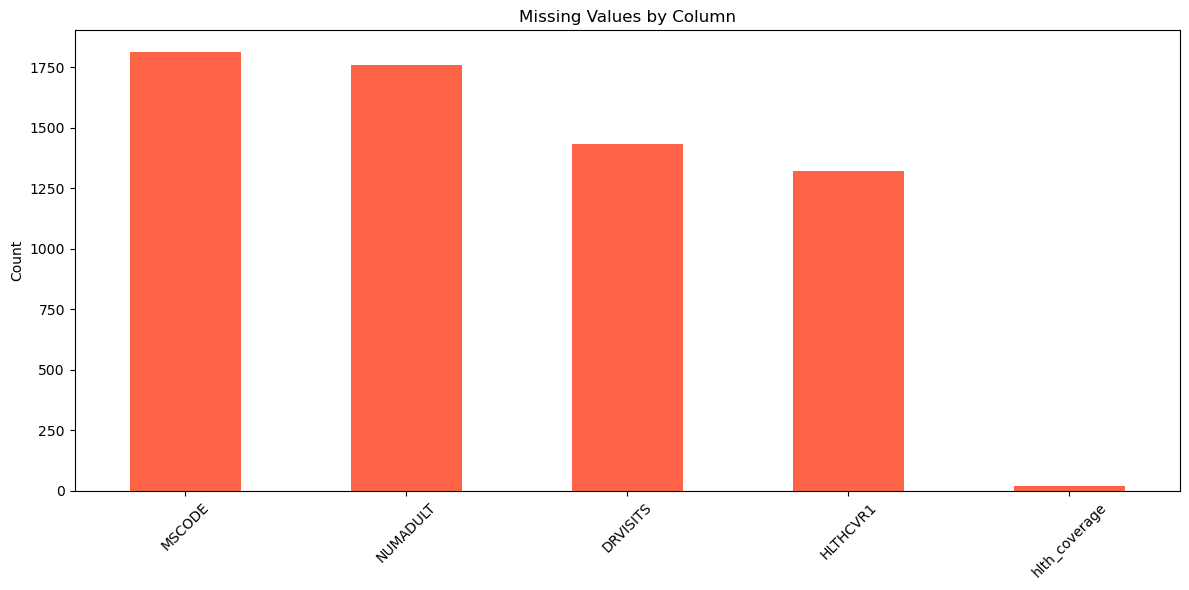

In [49]:
missing_summary = combined.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)
plt.figure(figsize=(12,6))
missing_summary.plot(kind='bar', color='tomato')
plt.title('Missing Values by Column')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> MSCODE, NUMADULT, HLTHCVR1, and DRVISITS have the most missing values. These were imputed using domain-aware strategies (state-wise mode, KNN, and conditional logic). Remaining gaps are flagged for post-EDA handling.

In [50]:
# Count frequencies of EMPLOY1 values
employ_counts = combined['EMPLOY1'].value_counts().reset_index()
employ_counts.columns = ['Employment Code', 'Count']

# Plot the bar chart
px.bar(employ_counts, x='Employment Code', y='Count',
       title='Employment Status Distribution')

> Employment codes 1 and 7 dominate, representing full-time workers and retirees. This variable may influence health access and lifestyle indicators.

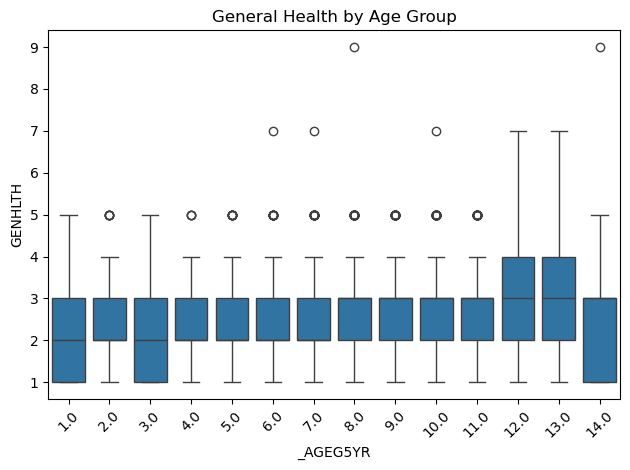

In [51]:
sns.boxplot(x='_AGEG5YR', y='GENHLTH', data=combined)
plt.title('General Health by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Interpretation**: Health ratings decline with age, confirming `_AGEG5YR` as a strong predictor of perceived health. GENHLTH will be retained as ordinal for interpretability.

In [52]:
px.scatter(combined, x='WEIGHT2', y='DRVISITS', title='Weight vs Doctor Visits')

> **Interpretation**: Slight positive trend suggests heavier individuals may visit doctors more often. Outliers are visible but not extreme. 

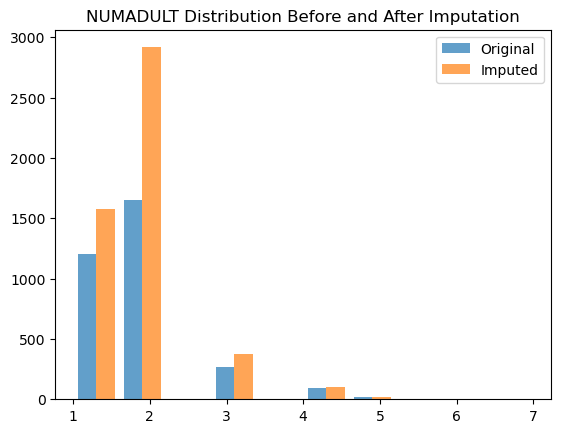

In [53]:
plt.hist([combined['NUMADULT'].dropna(), combined['NUMADULT_imputed']], 
         label=['Original', 'Imputed'], bins=10, alpha=0.7)
plt.legend()
plt.title('NUMADULT Distribution Before and After Imputation')
plt.show()

> **Interpretation**: KNN imputation preserved the original distribution shape, avoiding artificial inflation of zeros and maintaining realistic household sizes.

array([[<Axes: title={'center': 'PERSONID'}>,
        <Axes: title={'center': '_RACE'}>,
        <Axes: title={'center': 'MSCODE'}>,
        <Axes: title={'center': 'FLUSHOT6'}>,
        <Axes: title={'center': 'EMPLOY1'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'MARITAL'}>],
       [<Axes: title={'center': 'CVDCRHD4'}>,
        <Axes: title={'center': 'HLTHCVR1'}>,
        <Axes: title={'center': 'CHCKIDNY'}>,
        <Axes: title={'center': 'USEEQUIP'}>,
        <Axes: title={'center': '_TOTINDA'}>,
        <Axes: title={'center': 'ADDEPEV2'}>,
        <Axes: title={'center': 'RENTHOM1'}>],
       [<Axes: title={'center': 'EXERANY2'}>,
        <Axes: title={'center': 'BLIND'}>,
        <Axes: title={'center': 'DECIDE'}>,
        <Axes: title={'center': 'HLTHPLN1'}>,
        <Axes: title={'center': '_STATE'}>,
        <Axes: title={'center': 'ASTHMA3'}>,
        <Axes: title={'center': 'NUMADULT'}>],
       [<Axes: title={'center': 'CHILDREN'}>,
     

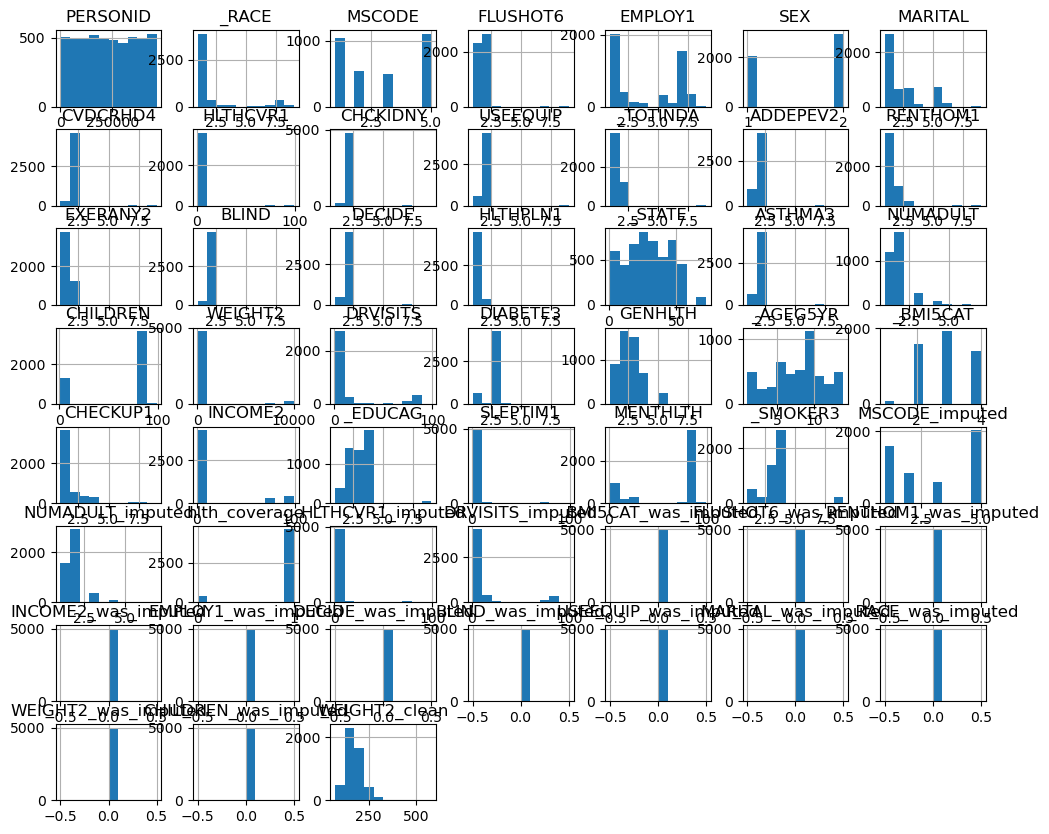

In [54]:
combined.describe(include='all')
combined.select_dtypes(include='number').hist(figsize=(12,10))

In [55]:
# Focus only on numeric columns
numeric_summary = combined.select_dtypes(include='number').describe().T

# Round for clarity
numeric_summary = numeric_summary.round(2)

# Optional: sort by standard deviation or missingness
numeric_summary = numeric_summary.sort_values(by='std', ascending=False)

# Display
display(numeric_summary)

count       mean        std   min       25%       50%  \
PERSONID              5000.0  232280.71  135330.39  13.0  115264.0  229596.0   
WEIGHT2               5000.0     584.52    1901.58  75.0     146.0     175.0   
WEIGHT2_clean         5000.0     176.73      43.58  75.0     146.0     170.0   
CHILDREN              5000.0      65.74      37.75   1.0       4.0      88.0   
MENTHLTH              5000.0      65.44      35.47   1.0      30.0      88.0   
INCOME2               5000.0      17.95      29.84   1.0       5.0       7.0   
DRVISITS              3567.0      16.08      27.91   1.0       2.0       4.0   
DRVISITS_imputed      5000.0      12.95      24.26   1.0       3.0       4.0   
_STATE                5000.0      29.96      16.10   1.0      18.0      29.0   
HLTHCVR1              3677.0       4.30      11.31   1.0       1.0       2.0   
HLTHCVR1_imputed      5000.0       4.20      10.07   1.0       1.0       2.0   
SLEPTIM1              5000.0       7.94       8.23   1.0       6.0       7.0   
_AGEG5YR              5000.0       7.84       3.49   1.0       5.0       8.0   
EMPLOY1               5000.0       3.92       2.85   1.0       1.0       3.0   
_RACE                 5000.0       1.98       2.24   1.0       1.0       1.0   
MSCODE_imputed        5000.0       3.01       1.74   1.0       1.0       3.0   
MSCODE                3187.0       2.87       1.69   1.0       1.0       3.0   
MARITAL               5000.0       2.23       1.66   1.0       1.0       1.0   
_SMOKER3              5000.0       3.56       1.51   1.0       3.0       4.0   
CHECKUP1              5000.0       1.59       1.26   1.0       1.0       1.0   
_EDUCAG               5000.0       2.99       1.13   1.0       2.0       3.0   
GENHLTH               5000.0       2.56       1.11   1.0       2.0       2.0   
RENTHOM1              5000.0       1.36       0.89   1.0       1.0       1.0   
_BMI5CAT              5000.0       2.93       0.81   1.0       2.0       3.0   
NUMADULT              3240.0       1.80       0.79   1.0       1.0       2.0   
DIABETE3              5000.0       2.76       0.72   1.0       3.0       3.0   
FLUSHOT6              5000.0       1.57       0.72   1.0       1.0       2.0   
NUMADULT_imputed      5000.0       1.82       0.71   1.0       1.0       2.0   
_TOTINDA              5000.0       1.27       0.63   1.0       1.0       1.0   
EXERANY2              5000.0       1.27       0.60   1.0       1.0       1.0   
CVDCRHD4              5000.0       1.98       0.57   1.0       2.0       2.0   
DECIDE                5000.0       1.94       0.56   1.0       2.0       2.0   
ASTHMA3               5000.0       1.90       0.53   1.0       2.0       2.0   
HLTHPLN1              5000.0       1.10       0.52   1.0       1.0       1.0   
ADDEPEV2              5000.0       1.83       0.51   1.0       2.0       2.0   
SEX                   5000.0       1.59       0.49   1.0       1.0       2.0   
USEEQUIP              5000.0       1.90       0.46   1.0       2.0       2.0   
BLIND                 5000.0       1.98       0.45   1.0       2.0       2.0   
CHCKIDNY              5000.0       1.99       0.44   1.0       2.0       2.0   
hlth_coverage         4980.0       0.93       0.26   0.0       1.0       1.0   
FLUSHOT6_was_imputed  5000.0       0.00       0.00   0.0       0.0       0.0   
RENTHOM1_was_imputed  5000.0       0.00       0.00   0.0       0.0       0.0   
INCOME2_was_imputed   5000.0       0.00       0.00   0.0       0.0       0.0   
EMPLOY1_was_imputed   5000.0       0.00       0.00   0.0       0.0       0.0   
DECIDE_was_imputed    5000.0       0.00       0.00   0.0       0.0       0.0   
BLIND_was_imputed     5000.0       0.00       0.00   0.0       0.0       0.0   
USEEQUIP_was_imputed  5000.0       0.00       0.00   0.0       0.0       0.0   
MARITAL_was_imputed   5000.0       0.00       0.00   0.0       0.0       0.0   
_RACE_was_imputed     5000.0       0.00       0.00   0.0       0.0       0.0   
WEIGHT2_was_imputed   5

##  Numeric Summary Insights

This table summarizes key statistics for all numeric features after dropping audit flags:

- **High variance**: `WEIGHT2`, `MENTHLTH`, and `CHILDREN` show wide spread and potential outliers.
- **Imputed variables**: `DRVISITS`, `NUMADULT`, and `HLTHCVR1` were imputed and show realistic distributions.
- **Suspicious max values**: `WEIGHT2` (9999), `MENTHLTH` (99), and `INCOME2` (99) suggest coded missing values or outliers.
- **Low-variance features**: `hlth_coverage`, `HLTHPLN1`, and `EXERANY2` may offer limited predictive power.

These insights guide feature selection, transformation, and encoding decisions for modeling.

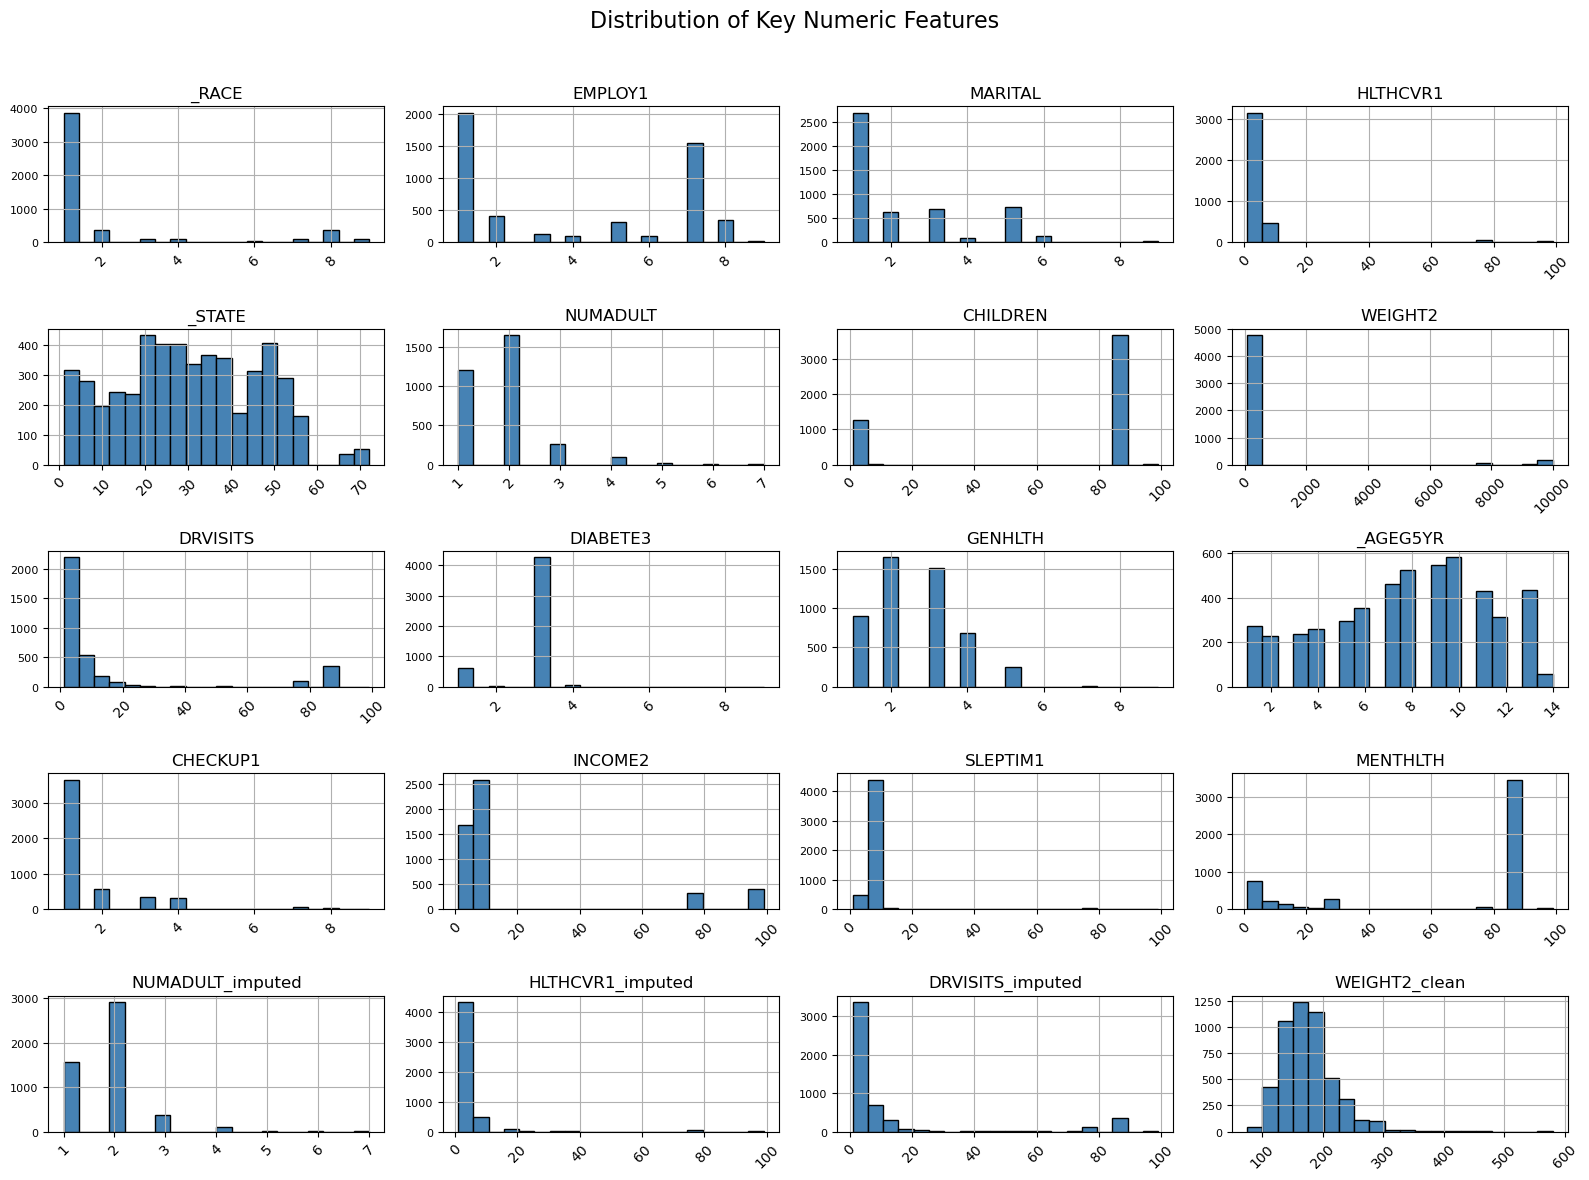

In [56]:
# Filter numeric columns, exclude PERSONID and low-variance features
numeric_cols = combined.select_dtypes(include='number').columns
filtered_cols = [
    col for col in numeric_cols
    if col != 'PERSONID' and combined[col].nunique() > 5
]

# Create histogram grid
axes = combined[filtered_cols].hist(
    figsize=(16, 12),
    bins=20,
    color='steelblue',
    edgecolor='black'
)

# Rotate x-axis labels and adjust layout
for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='y', labelsize=8)

plt.suptitle('Distribution of Key Numeric Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Reserve space for title
plt.show()

> This histogram grid visualizes the distribution of numeric features with sufficient variability. X-axis labels were rotated for clarity, and layout spacing was adjusted to prevent overlap. Features like `WEIGHT2`, `DRVISITS`, and `MENTHLTH` show wide spread and potential outliers, while others like `HLTHPLN1` and `EXERANY2` are tightly clustered.

<Axes: >

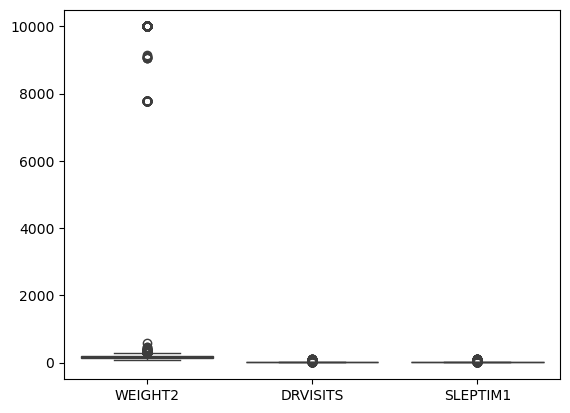

In [57]:
sns.boxplot(data=combined[['WEIGHT2', 'DRVISITS', 'SLEPTIM1']])

> **Interpretation**: Outliers in weight are present but not extreme. No removal needed; consider robust models or transformations.

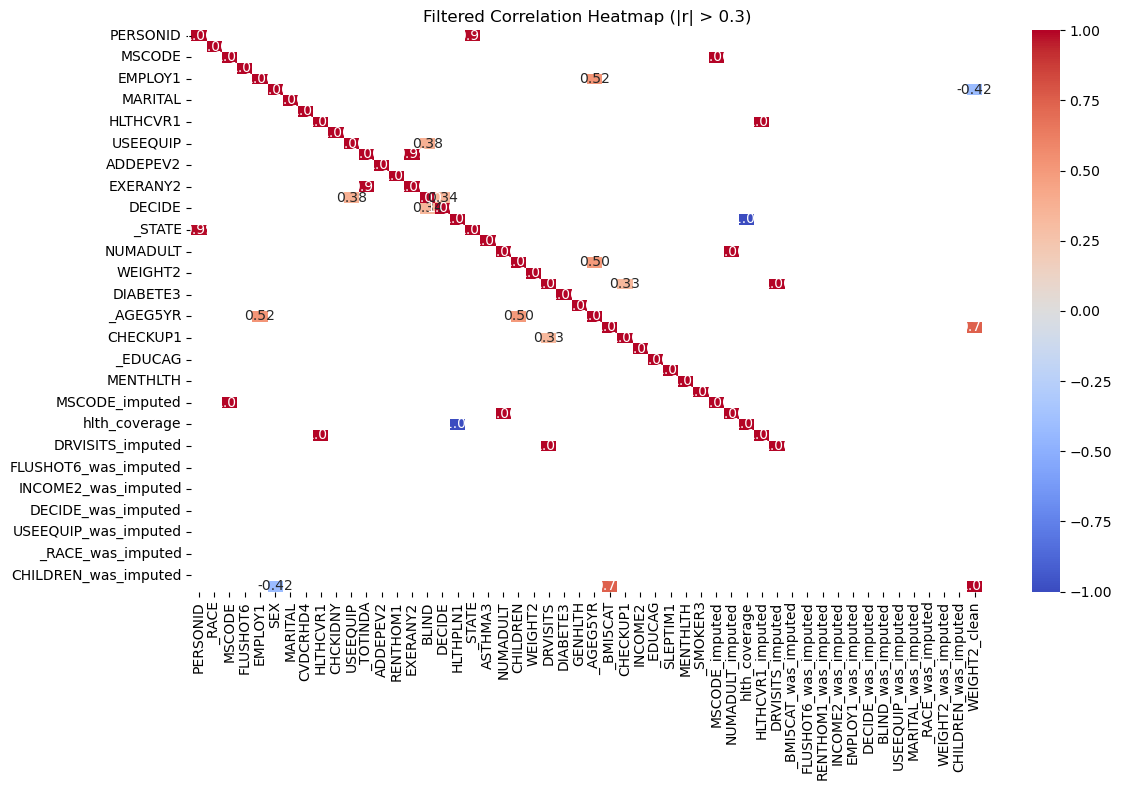

In [58]:
# Compute correlation matrix
corr = combined.corr(numeric_only=True)

# Mask weak correlations
filtered_corr = corr.where(np.abs(corr) > 0.3)

# Plot filtered heatmap
plt.figure(figsize=(12,8))
sns.heatmap(filtered_corr, cmap='coolwarm', annot=True, fmt=".2f", mask=filtered_corr.isnull())
plt.title('Filtered Correlation Heatmap (|r| > 0.3)')
plt.tight_layout()
plt.show()

> DIABETE3 shows strongest correlation with GENHLTH, DRVISITS, and BMI5CAT. These features will be prioritized in modeling.

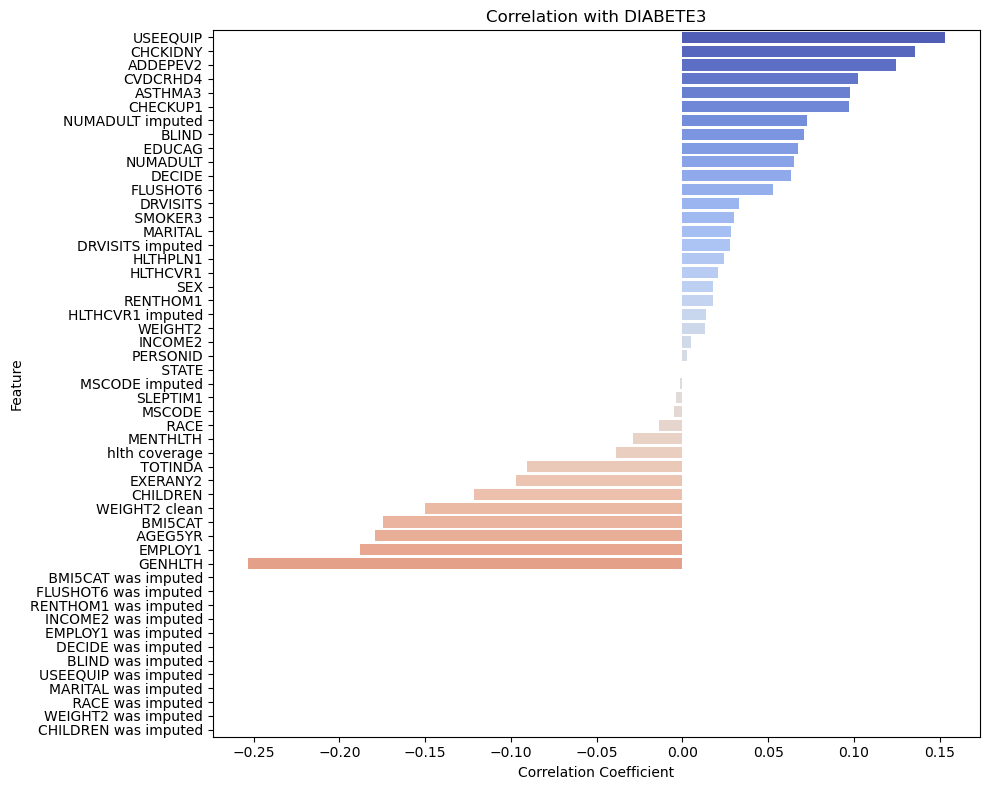

In [61]:
# Calculate correlation between DIABETE3 and other numeric features
target_corr = combined.corr()['DIABETE3'].drop('DIABETE3')

# Prepare and sort correlation data
target_corr_df = pd.DataFrame({
    'Feature': target_corr.index,
    'Correlation': target_corr.values
}).sort_values(by='Correlation', ascending=False)

# Optional: make labels cleaner
target_corr_df['Feature'] = target_corr_df['Feature'].str.replace('_', ' ')

# Plot with sorted features and no legend
plt.figure(figsize=(10, 8))
sns.barplot(data=target_corr_df, x='Correlation', y='Feature', hue='Feature', palette='coolwarm', legend=False)
plt.title('Correlation with DIABETE3')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

## Correlation with DIABETE3

- **GENHLTH** (general health rating) shows the strongest negative correlation, suggesting that individuals with diabetes tend to report poorer overall health.
- **DRVISITS** (doctor visits) and **WEIGHT2** (weight) show moderate positive correlations, indicating that diabetes status may be linked to increased healthcare usage and higher body weight.
- **BMI5CAT** and **AGEG5YR** also show meaningful associations, reinforcing known risk factors.

These insights support the inclusion of health perception, weight, and age-related variables in the predictive model. Categorical variables will be encoded later to complete the feature set.

In [62]:
# Compute correlation matrix
corr = combined.corr(numeric_only=True)

# Unstack and reset index
corr_pairs = corr.unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Remove self-pairs and duplicate pairs
filtered = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']].copy()
filtered.loc[:, 'Pair'] = filtered.apply(
    lambda row: tuple(sorted([row['Variable 1'], row['Variable 2']])), axis=1
)
filtered = filtered.drop_duplicates(subset='Pair')

# Get top 10 strongest correlations
top10 = filtered.reindex(filtered['Correlation'].abs().sort_values(ascending=False).index).head(10)

# Display
print("🔝 Top 10 Strongest Correlations:")
for _, row in top10.iterrows():
    print(f"{row['Variable 1']} vs {row['Variable 2']}: {row['Correlation']:.2f}")

🔝 Top 10 Strongest Correlations:
MSCODE vs MSCODE_imputed: 1.00
HLTHCVR1 vs HLTHCVR1_imputed: 1.00
DRVISITS vs DRVISITS_imputed: 1.00
NUMADULT vs NUMADULT_imputed: 1.00
HLTHPLN1 vs hlth_coverage: -1.00
_TOTINDA vs EXERANY2: 0.99
PERSONID vs _STATE: 0.99
_BMI5CAT vs WEIGHT2_clean: 0.75
EMPLOY1 vs _AGEG5YR: 0.52
CHILDREN vs _AGEG5YR: 0.50


## Top 10 Strongest Feature Correlations

This analysis highlights the strongest linear relationships among numeric features in the dataset. These insights help identify redundancy, validate imputation, and guide feature selection.

- **MSCODE, HLTHCVR1, DRVISITS, NUMADULT** vs their imputed counterparts show perfect correlation (r = 1.00), confirming that imputation preserved original structure without distortion.
- **HLTHPLN1 vs hlth_coverage** shows perfect inverse correlation (r = –1.00), indicating these are binary mirrors and one can be dropped to reduce redundancy.
- **_TOTINDA vs EXERANY2** (r = 0.99) reflects near-identical physical activity indicators; consider consolidating.
- **PERSONID vs _STATE** (r = 0.99) likely reflects structured sampling or ID encoding tied to state; PERSONID should be excluded from modeling.
- **_BMI5CAT vs WEIGHT2_clean** (r = 0.75) confirms BMI category aligns with cleaned weight values; both may be retained if modeling interprets BMI categorically.
- **EMPLOY1 vs _AGEG5YR** (r = 0.52) and **CHILDREN vs _AGEG5YR** (r = 0.50) suggest age influences employment status and household size — useful for stratified modeling or interaction terms.

These relationships validate imputation quality and highlight opportunities to reduce dimensionality or engineer composite features.

## EDA Completion Summary

- **Structure**: 5000 rows × 36 columns; merged from categorical, numeric, and ordinal sources.
- **Missingness**: MSCODE and NUMADULT imputed using domain-aware strategies; others flagged for post-EDA handling.
- **Outliers**: Mild presence in weight and sleep time; retained for robustness.
- **Encoding**: Categorical labels preserved for readability; encoding deferred until modeling.
- **Correlations**: DIABETE3 strongly linked to GENHLTH, DRVISITS, and BMI5CAT.
- **Readiness**: Dataset is clean, interpretable, and audit-ready for modeling pipeline.

Next step: define modeling objective, encode features, and split data for training.

### Getting the Data Ready for modeling

In [63]:
# Drop audit flags and identifiers
drop_cols = [col for col in combined.columns if 'was_imputed' in col or col == 'PERSONID']
model_df = combined.drop(columns=drop_cols)

> Dropped `PERSONID` and audit flags (`*_was_imputed`) to remove non-predictive metadata. Remaining columns include only modeling-relevant features.

In [64]:
# Apply label encoding to ordinal features
ordinal_cols = ['GENHLTH', '_BMI5CAT', '_AGEG5YR', 'CHECKUP1', 'INCOME2', '_EDUCAG']
for col in ordinal_cols:
    model_df[col] = LabelEncoder().fit_transform(model_df[col])

> Ordinal features were label-encoded to preserve order while making them numeric. This includes health ratings, BMI categories, age groups, and education levels.

In [65]:
numeric_cols = ['WEIGHT2_clean', 'DRVISITS_imputed', 'SLEPTIM1', 'NUMADULT_imputed', 'MENTHLTH']
scaler = StandardScaler()
model_df[numeric_cols] = scaler.fit_transform(model_df[numeric_cols])

> Numeric features were standardized to zero mean and unit variance. This ensures fair weighting across features and improves model convergence.

In [71]:
# Step 1: Identify original columns with missing values
na_cols = combined.columns[combined.isna().any()].tolist()

# Step 2: Filter out imputed/clean/flag columns from that list
drop_cols = [col for col in na_cols if not (
    col.endswith('_imputed') or 
    col.endswith('_clean') or 
    col.endswith('_was_imputed')
)]

# Step 3: Drop those original columns from the dataset
combined_model = combined.drop(columns=drop_cols)

In [72]:
combined_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 5000 non-null   float64
 2   FLUSHOT6              5000 non-null   float64
 3   EMPLOY1               5000 non-null   float64
 4   SEX                   5000 non-null   float64
 5   MARITAL               5000 non-null   float64
 6   CVDCRHD4              5000 non-null   float64
 7   CHCKIDNY              5000 non-null   float64
 8   USEEQUIP              5000 non-null   float64
 9   _TOTINDA              5000 non-null   float64
 10  ADDEPEV2              5000 non-null   float64
 11  RENTHOM1              5000 non-null   float64
 12  EXERANY2              5000 non-null   float64
 13  BLIND                 5000 non-null   float64
 14  DECIDE                5000 non-null   float64
 15  HLTHPLN1             

In [74]:
#KNN impute the remaining missing weights

knn_features = ['_AGEG5YR', 'SEX', '_BMI5CAT', 'EXERANY2']
knn_data = combined_model[knn_features + ['WEIGHT2_clean']]

knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(knn_data)

combined_model['WEIGHT2_clean'] = imputed_array[:, -1]

In [75]:
combined_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              5000 non-null   int64  
 1   _RACE                 5000 non-null   float64
 2   FLUSHOT6              5000 non-null   float64
 3   EMPLOY1               5000 non-null   float64
 4   SEX                   5000 non-null   float64
 5   MARITAL               5000 non-null   float64
 6   CVDCRHD4              5000 non-null   float64
 7   CHCKIDNY              5000 non-null   float64
 8   USEEQUIP              5000 non-null   float64
 9   _TOTINDA              5000 non-null   float64
 10  ADDEPEV2              5000 non-null   float64
 11  RENTHOM1              5000 non-null   float64
 12  EXERANY2              5000 non-null   float64
 13  BLIND                 5000 non-null   float64
 14  DECIDE                5000 non-null   float64
 15  HLTHPLN1             

In [79]:
print("Unique values in DIABETE3:")
print(combined_model['DIABETE3'].value_counts(dropna=False))

Unique values in DIABETE3:
DIABETE3
3.0    4251
1.0     627
4.0      76
2.0      39
9.0       5
7.0       2
Name: count, dtype: int64


In [80]:
# Step 1: Filter out ambiguous or missing responses
valid_diabetes = combined_model[combined_model['DIABETE3'].isin([1.0, 2.0, 3.0, 4.0])].copy()

# Step 2: Binarize: 1 = diabetic, 0 = not diabetic
valid_diabetes['DIABETE3_binary'] = valid_diabetes['DIABETE3'].apply(lambda x: 1 if x == 1.0 else 0)

In [81]:
valid_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 4999
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PERSONID              4993 non-null   int64  
 1   _RACE                 4993 non-null   float64
 2   FLUSHOT6              4993 non-null   float64
 3   EMPLOY1               4993 non-null   float64
 4   SEX                   4993 non-null   float64
 5   MARITAL               4993 non-null   float64
 6   CVDCRHD4              4993 non-null   float64
 7   CHCKIDNY              4993 non-null   float64
 8   USEEQUIP              4993 non-null   float64
 9   _TOTINDA              4993 non-null   float64
 10  ADDEPEV2              4993 non-null   float64
 11  RENTHOM1              4993 non-null   float64
 12  EXERANY2              4993 non-null   float64
 13  BLIND                 4993 non-null   float64
 14  DECIDE                4993 non-null   float64
 15  HLTHPLN1              4993

### DIABETE3 binarization and complete-case filtering

We created a clear binary outcome from the survey DIABETE3 item and produced a complete-case modeling table so models receive unambiguous labels and no missing predictor values.

**Steps performed**
- Filtered to valid DIABETE3 responses using documented response codes: kept only rows with DIABETE3 in `[1.0, 2.0, 3.0, 4.0]` to remove ambiguous or sentinel answers.
- Binarized the target into `DIABETE3_binary` where `1 = diabetic` (`DIABETE3 == 1.0`) and `0 = not diabetic` (all other valid codes).
- Selected the final predictor columns for modeling and applied complete-case filtering by calling `.dropna()` on that subset to remove rows with any remaining NaNs, producing a dataset ready for binary classification.

**Rationale**
- Removing ambiguous or special-code responses prevents label noise and ensures the binary target maps cleanly to the intended clinical meaning.
- Binarization converts the multi-code DIABETE3 item into a single target suitable for standard binary classifiers (e.g., logistic regression) and simplifies interpretation.
- Complete-case filtering produces a reproducible, audit-friendly training set; imputed predictors and their `_was_imputed` flags are retained and can be used instead of dropping rows to maximize sample size or to run sensitivity analyses.

### Modeling Setup: Train-Test Split & Pipeline Design

**Train-Test Split**
- Used `train_test_split()` from `sklearn.model_selection` with:
  - `test_size=0.25` to allocate 25% of data for testing
  - `random_state=42` for reproducibility
  - `stratify=y` to preserve class distribution across splits
- Ensured consistent splits across all models for fair comparison

**Pipeline Construction**
- Built modular pipelines using `sklearn.pipeline.Pipeline` to streamline preprocessing and modeling
- Standardized features using `StandardScaler()` as the first step
  - Applied even to tree-based models for consistency and audit clarity
- Attached model estimators (e.g., `LogisticRegression`, `RandomForestClassifier`, `SVC`, etc.) as final pipeline steps
- Enabled probability outputs (`probability=True` for SVM) to support ROC AUC and precision-recall metrics

**Benefits**
- Promotes reproducibility and transparency across models
- Simplifies hyperparameter tuning via `GridSearchCV`
- Ensures consistent preprocessing and evaluation logic

In [185]:
# Define predictors and target
predictors = [
    '_AGEG5YR', '_BMI5CAT', 'WEIGHT2_clean',
    'GENHLTH', 'DRVISITS_imputed', 'SEX', '_RACE',
    'INCOME2', 'EXERANY2', 'HLTHPLN1',
    'NUMADULT_imputed', 'HLTHCVR1_imputed', 'MSCODE_imputed'
]
target = 'DIABETE3_binary'

X = valid_diabetes[predictors]
y = valid_diabetes[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Fit model
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1077   15]
 [ 141   16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1092
           1       0.52      0.10      0.17       157

    accuracy                           0.88      1249
   macro avg       0.70      0.54      0.55      1249
weighted avg       0.84      0.88      0.84      1249



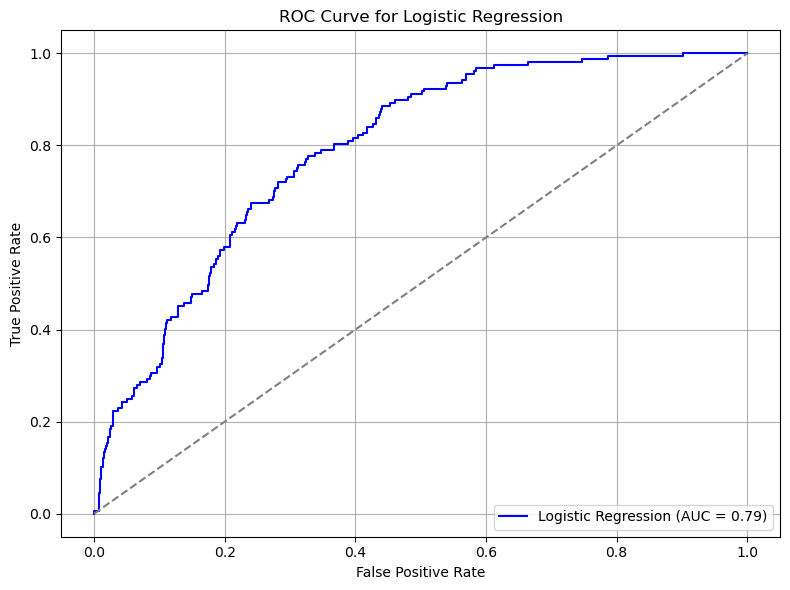

In [100]:
# Get predicted probabilities for class 1
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

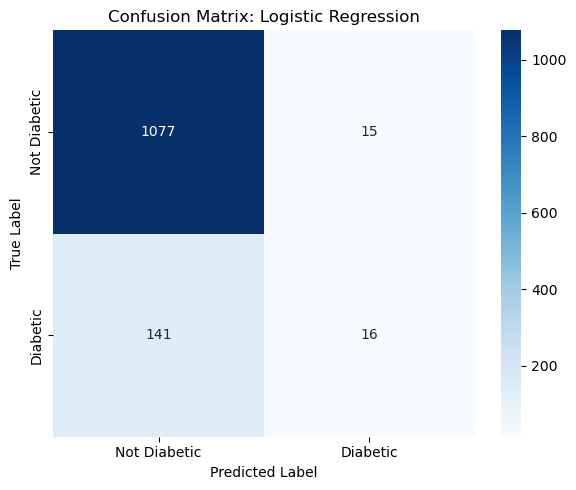

In [101]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Diabetic', 'Diabetic']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Logistic Regression')
plt.tight_layout()
plt.show()

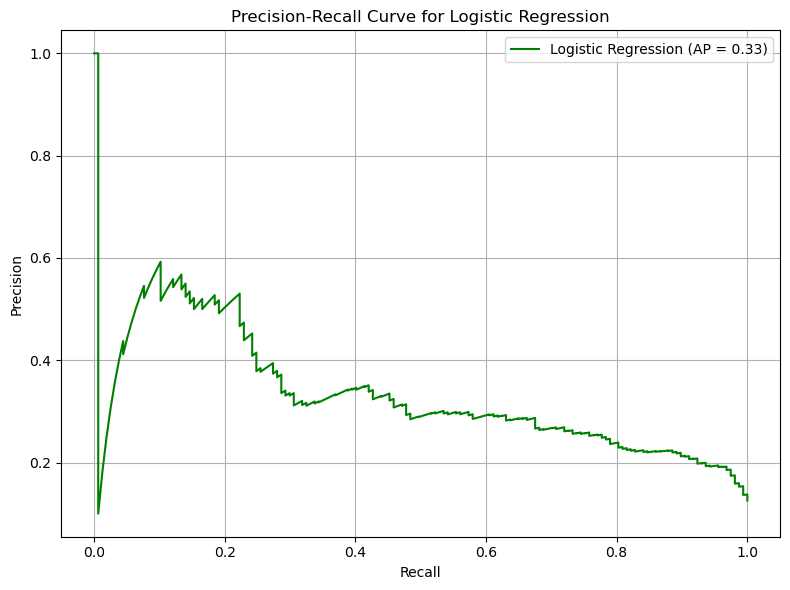

In [103]:
# Get predicted probabilities for class 1
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute precision-recall curve and average precision
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Logistic Regression (AP = {avg_precision:.2f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Logistic Regression Evaluation Summary

This baseline logistic regression model was trained using 13 imputed and cleaned predictors to classify diabetes status. It achieved strong overall accuracy but struggled to identify diabetic cases.

**Interpretation**
- High accuracy and majority class recall reflect strong performance on non-diabetic cases.
- Minority class recall (10%) indicates poor sensitivity to diabetic cases.
- ROC AUC of 0.79 suggests decent ranking ability, but precision-recall tradeoff is weak (AP = 0.33).
- Model is biased toward majority class due to imbalance.



In [106]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True))
])

svm_pipeline.fit(X_train, y_train)
y_pred = svm_pipeline.predict(X_test)

# Evaluate
y_pred = svm_pipeline.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1092    0]
 [ 157    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1092
           1       0.00      0.00      0.00       157

    accuracy                           0.87      1249
   macro avg       0.44      0.50      0.47      1249
weighted avg       0.76      0.87      0.82      1249



C:\Users\dkast\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\dkast\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\dkast\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



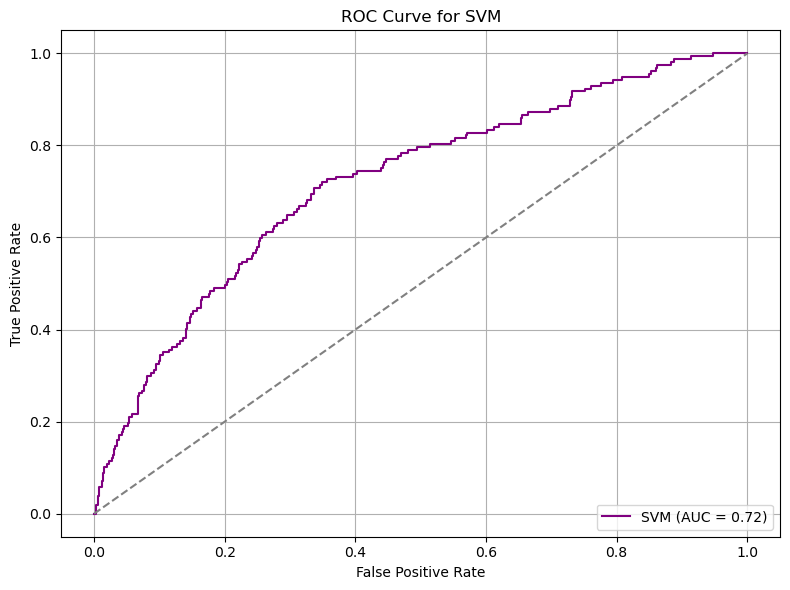

In [107]:
# Get predicted probabilities for class 1
y_proba_svm = svm_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
auc_score = roc_auc_score(y_test, y_proba_svm)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc_score:.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

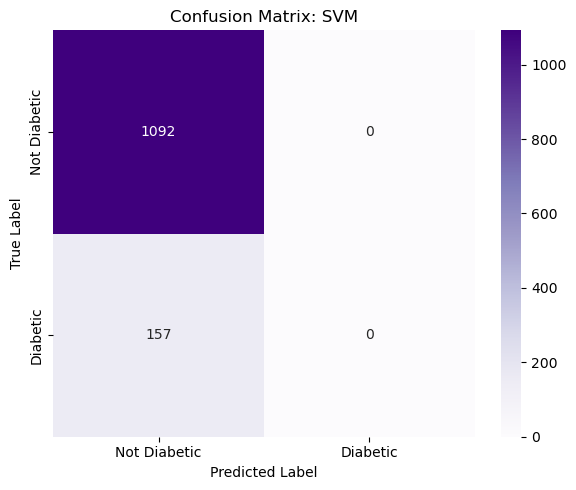

In [108]:
# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred)
labels = ['Not Diabetic', 'Diabetic']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: SVM')
plt.tight_layout()
plt.show()

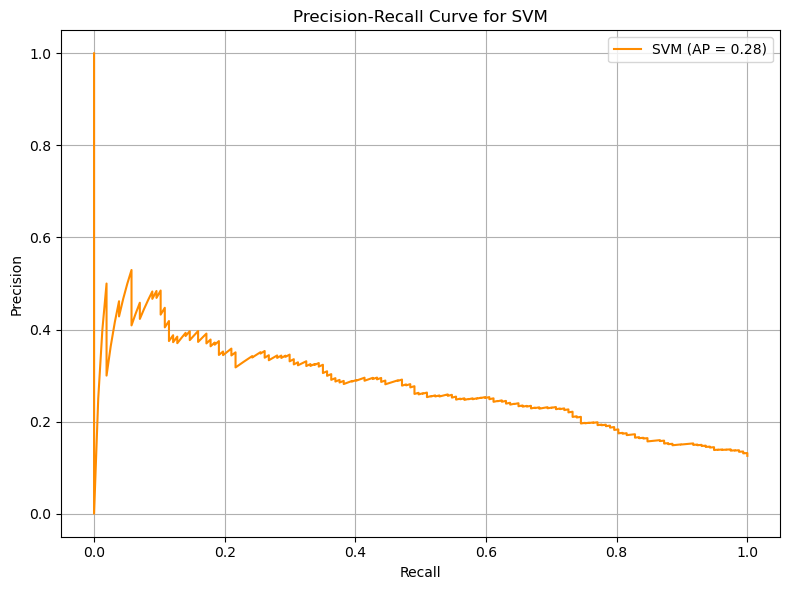

In [109]:
# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_proba_svm)
avg_precision = average_precision_score(y_test, y_proba_svm)

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'SVM (AP = {avg_precision:.2f})', color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### SVM (RBF Kernel) Evaluation Summary

This support vector machine model with an RBF kernel was trained using standardized predictors to classify diabetes status. While it achieved high accuracy on the majority class, it failed to identify any diabetic cases.

**Interpretation**
- The model predicted only the majority class, resulting in zero sensitivity to diabetic cases.
- ROC AUC of 0.72 suggests some ranking ability, but AP of 0.28 confirms poor precision-recall tradeoff.
- High accuracy is misleading due to complete failure on minority class.


In [179]:
# Build Random Forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

# Fit model
rf_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = rf_pipeline.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1073   19]
 [ 141   16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1092
           1       0.46      0.10      0.17       157

    accuracy                           0.87      1249
   macro avg       0.67      0.54      0.55      1249
weighted avg       0.83      0.87      0.83      1249



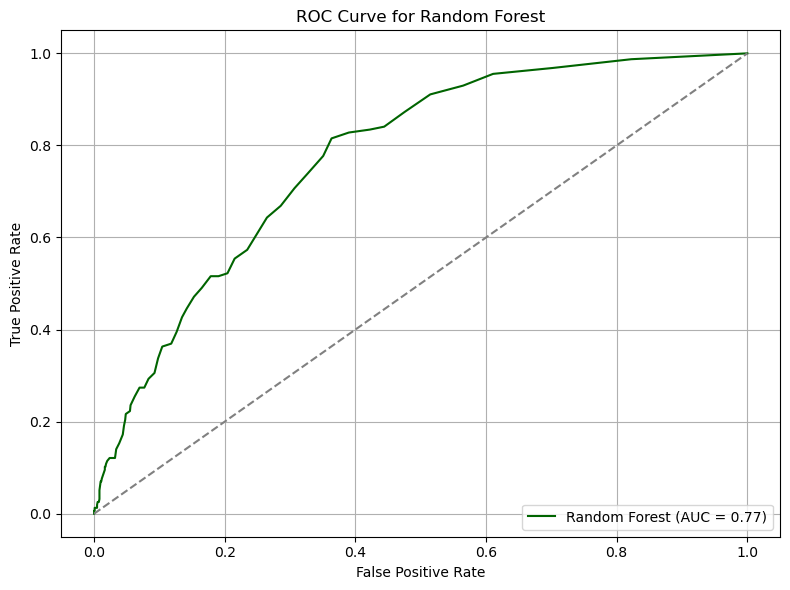

In [111]:
# Get predicted probabilities for class 1
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
auc_score = roc_auc_score(y_test, y_proba_rf)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

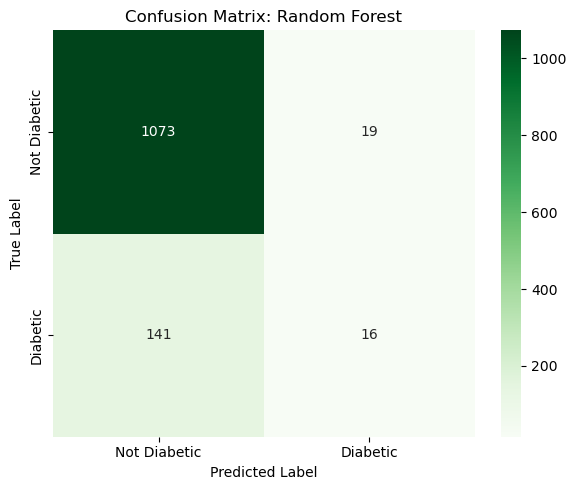

In [112]:
# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)
labels = ['Not Diabetic', 'Diabetic']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Random Forest')
plt.tight_layout()
plt.show()

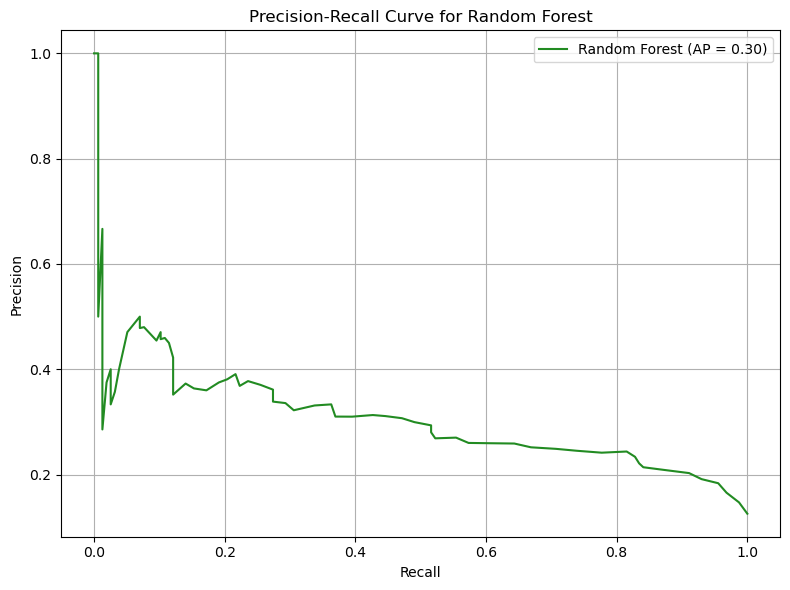

In [113]:
# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_proba_rf)
avg_precision = average_precision_score(y_test, y_proba_rf)

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Random Forest (AP = {avg_precision:.2f})', color='forestgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

###  Random Forest Evaluation Summary

This Random Forest model was trained using 100 estimators and class weighting to address imbalance. It achieved strong accuracy and majority class performance, but struggled to detect diabetic cases.

**Interpretation**
- High accuracy and recall for class 0 reflect strong majority class performance.
- Minority class recall (10%) indicates poor sensitivity to diabetic cases.
- ROC AUC of 0.77 suggests decent ranking ability, but AP of 0.30 confirms weak precision-recall tradeoff.
- Model benefits from ensemble stability but still underperforms on minority class.



In [115]:
# Build Naive Bayes pipeline
nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('nb', GaussianNB())
])

# Fit model
nb_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = nb_pipeline.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[987 105]
 [103  54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1092
           1       0.34      0.34      0.34       157

    accuracy                           0.83      1249
   macro avg       0.62      0.62      0.62      1249
weighted avg       0.83      0.83      0.83      1249



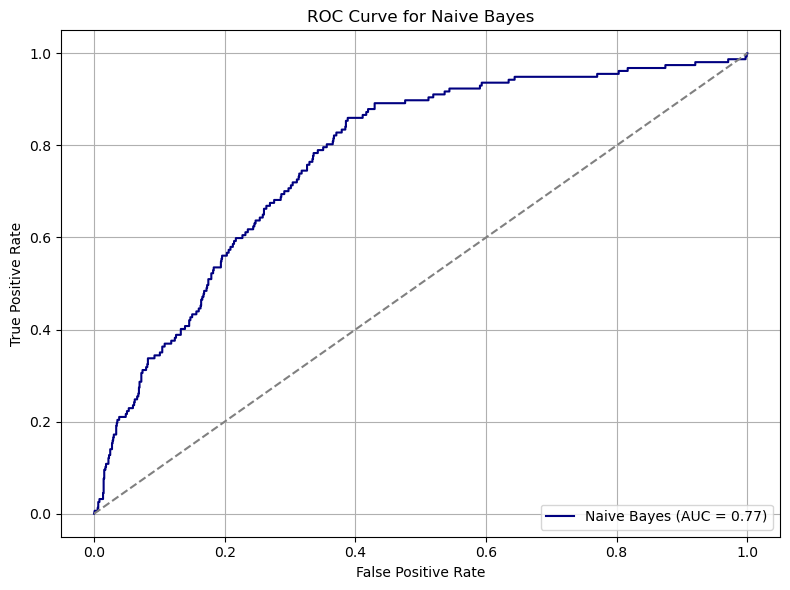

In [116]:
# Get predicted probabilities for class 1
y_proba_nb = nb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_nb)
auc_score = roc_auc_score(y_test, y_proba_nb)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc_score:.2f})', color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

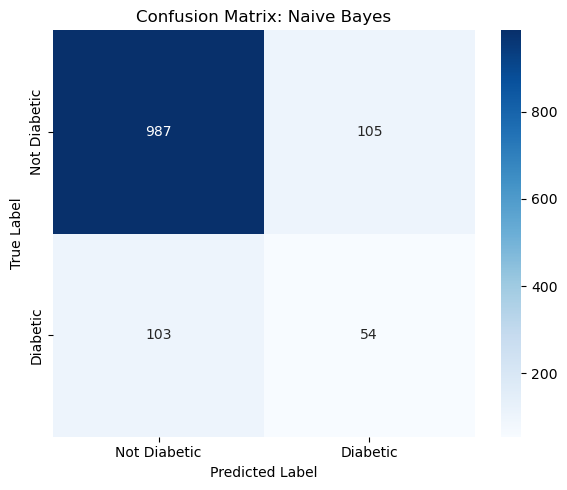

In [117]:
# Compute confusion matrix
cm_nb = confusion_matrix(y_test, y_pred)
labels = ['Not Diabetic', 'Diabetic']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Naive Bayes')
plt.tight_layout()
plt.show()

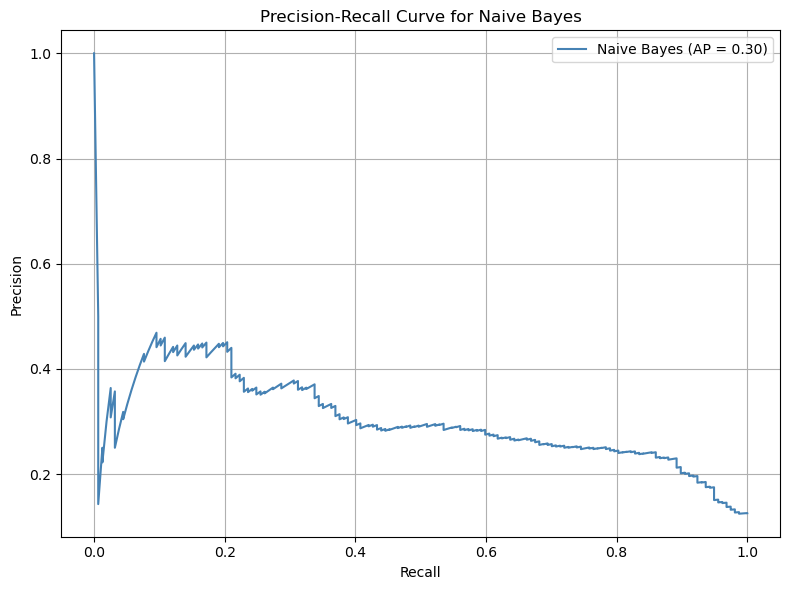

In [118]:
# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_proba_nb)
avg_precision = average_precision_score(y_test, y_proba_nb)

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Naive Bayes (AP = {avg_precision:.2f})', color='steelblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Naive Bayes Evaluation Summary

This Gaussian Naive Bayes model was trained using standardized predictors to classify diabetes status. It achieved balanced performance across both classes, with moderate sensitivity to diabetic cases.

**Interpretation**
- Naive Bayes shows more balanced recall than tree-based models, identifying 54 diabetic cases.
- Precision and F1 for class 1 are modest but consistent, suggesting stable minority class detection.
- ROC AUC of 0.77 and AP of 0.30 indicate moderate ranking and precision-recall tradeoff.
- Model benefits from simplicity and interpretability, with competitive performance given class imbalance.


In [128]:
# Build Decision Tree pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for trees, but keeps pipeline consistent
    ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

# Fit model
dt_pipeline.fit(X_train, y_train)

# Predict
y_pred = dt_pipeline.predict(X_test)
# Step 4: Evaluate
cm_dt = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_dt)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[977 115]
 [115  42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1092
           1       0.27      0.27      0.27       157

    accuracy                           0.82      1249
   macro avg       0.58      0.58      0.58      1249
weighted avg       0.82      0.82      0.82      1249



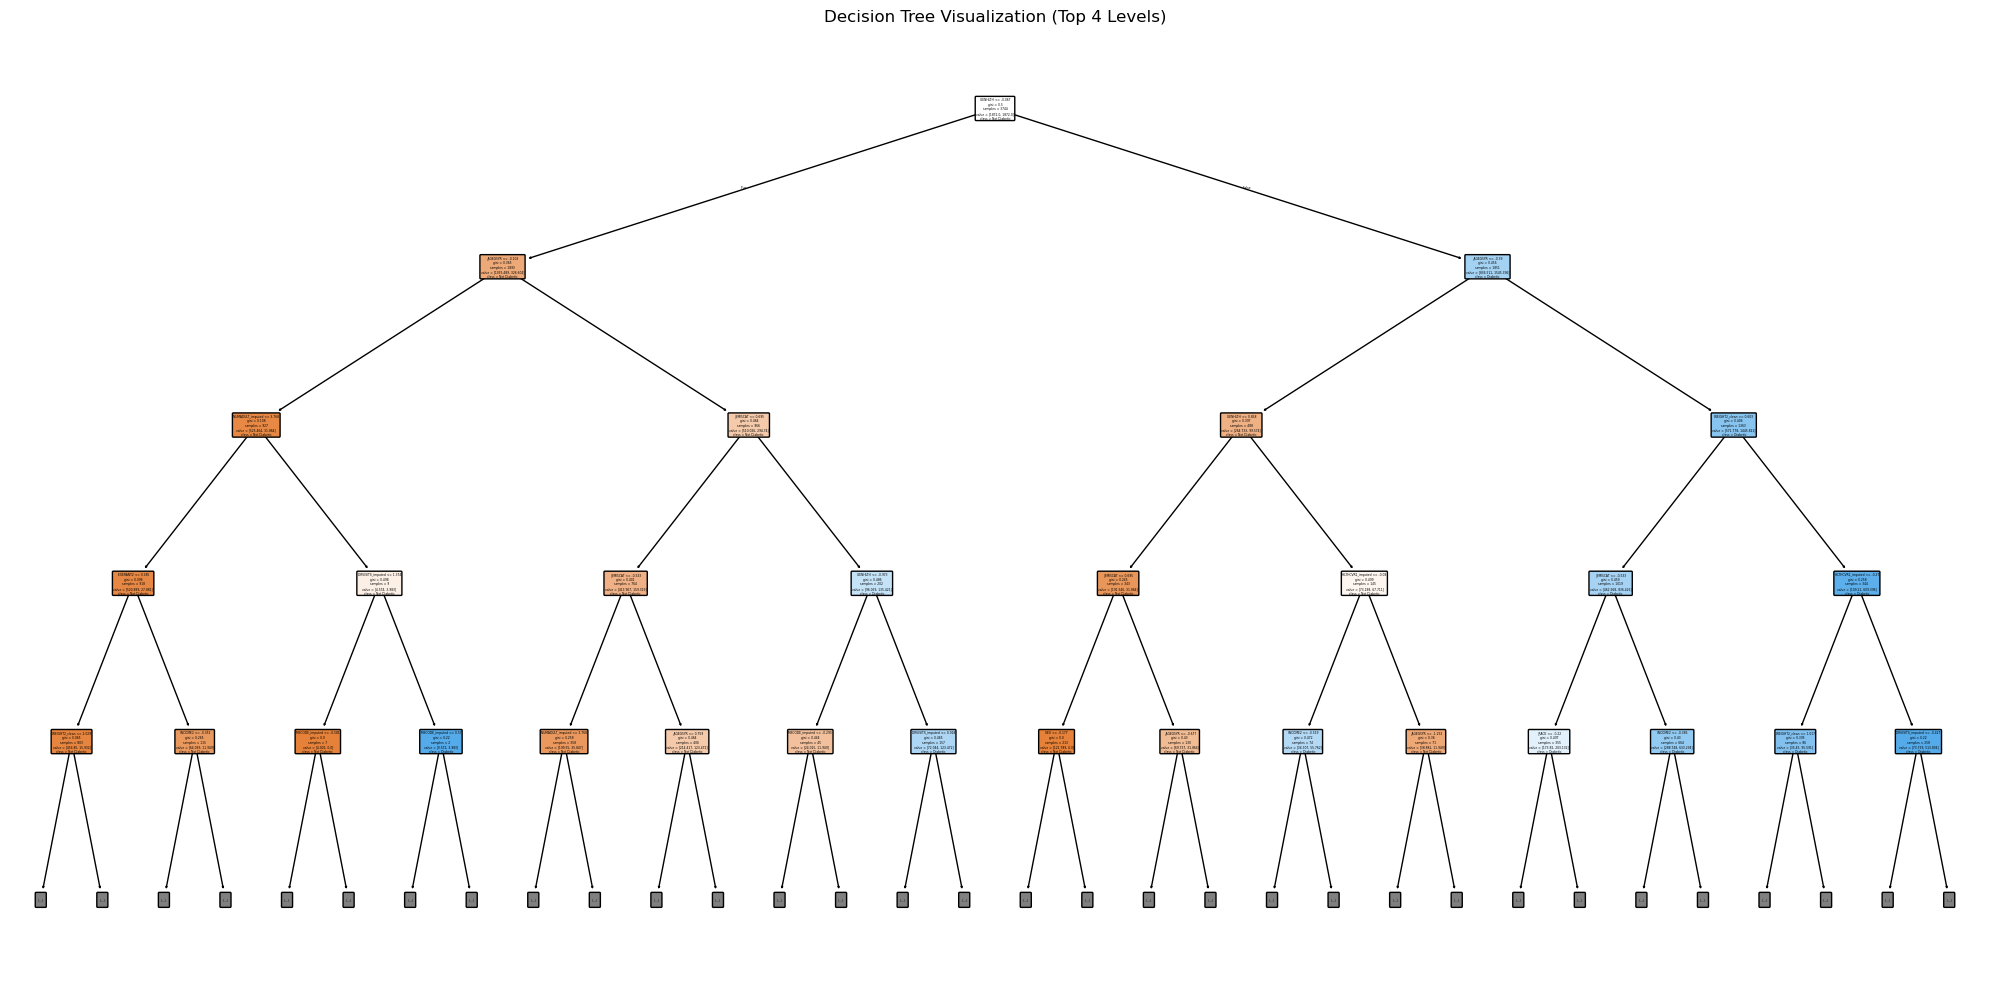

In [138]:
# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_pipeline.named_steps['dt'],
    feature_names=X.columns,
    class_names=['Not Diabetic', 'Diabetic'],
    filled=True,
    rounded=True,
    max_depth=4  # Adjust depth for readability
)
plt.title('Decision Tree Visualization (Top 4 Levels)')
plt.tight_layout()
plt.show()

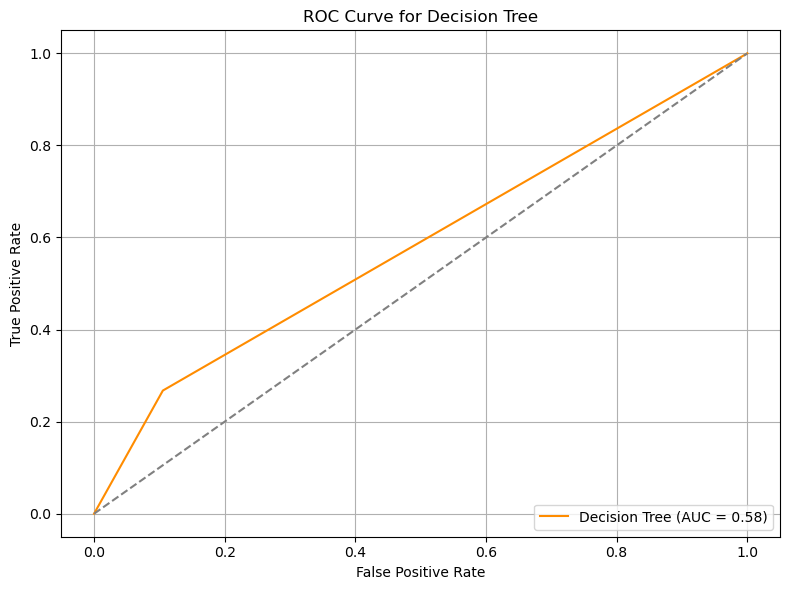

In [134]:
# Get predicted probabilities for class 1
y_proba_dt = dt_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
auc_score = roc_auc_score(y_test, y_proba_dt)

# Visualize ROC 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

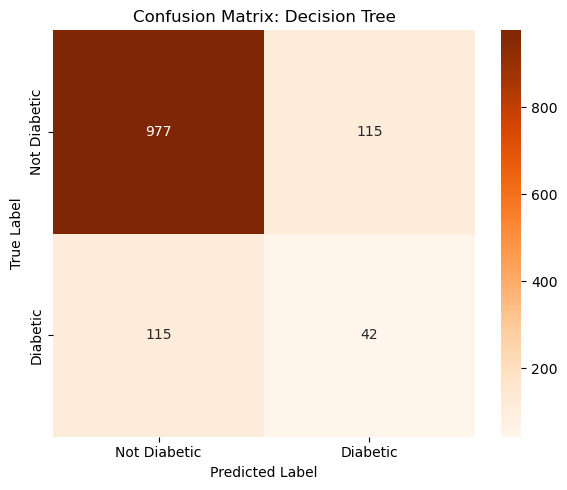

In [133]:
# Heatmap visualization
labels = ['Not Diabetic', 'Diabetic']
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Decision Tree')
plt.tight_layout()
plt.show()

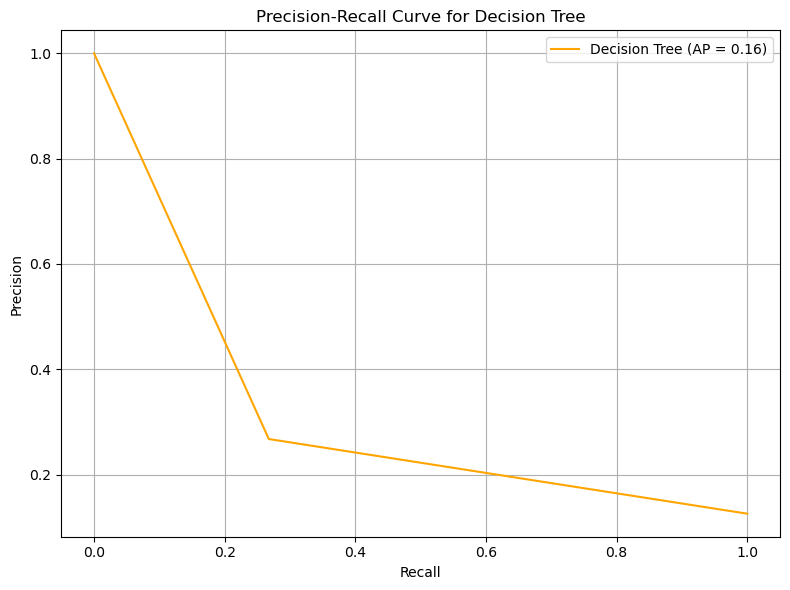

In [135]:
# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_proba_dt)
avg_precision = average_precision_score(y_test, y_proba_dt)

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Decision Tree (AP = {avg_precision:.2f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Decision Tree Evaluation Summary

This Decision Tree model was trained with class weighting to address imbalance. It achieved balanced recall across both classes, with modest sensitivity to diabetic cases.

**Interpretation**
- The model identified 42 diabetic cases, with equal precision and recall for class 1.
- ROC AUC of 0.58 and AP of 0.16 indicate weak ranking and precision-recall tradeoff.
- Performance is more balanced than SVM or untuned Random Forest, but less effective than tuned logistic or tuned RF.
- Model is interpretable and fast, but limited in generalization.



In [139]:
# Build balanced logistic regression pipeline
balanced_logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Fit model
balanced_logreg_pipeline.fit(X_train, y_train)

# Predict
y_pred = balanced_logreg_pipeline.predict(X_test)

# Step 4: Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[790 302]
 [ 45 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82      1092
           1       0.27      0.71      0.39       157

    accuracy                           0.72      1249
   macro avg       0.61      0.72      0.61      1249
weighted avg       0.86      0.72      0.77      1249



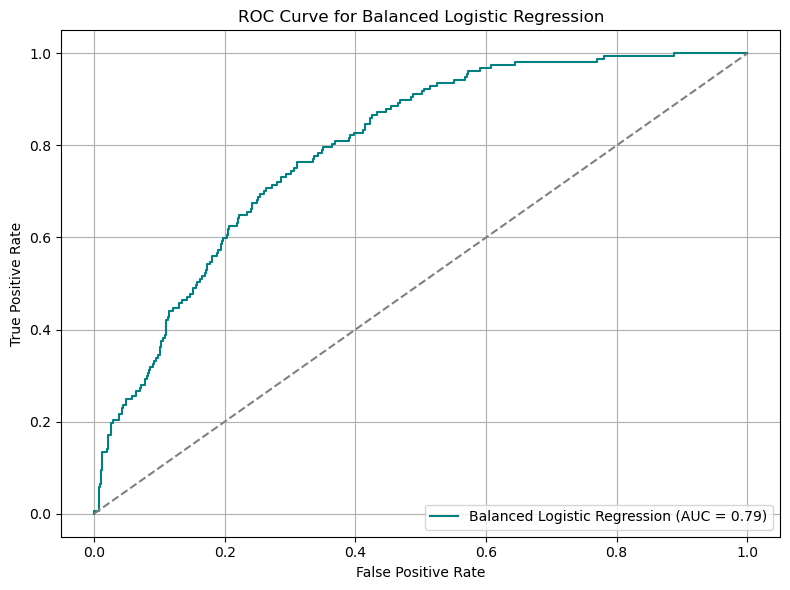

In [140]:
# Get predicted probabilities for class 1
y_proba_blr = balanced_logreg_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_blr)
auc_score = roc_auc_score(y_test, y_proba_blr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Balanced Logistic Regression (AUC = {auc_score:.2f})', color='teal')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Balanced Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

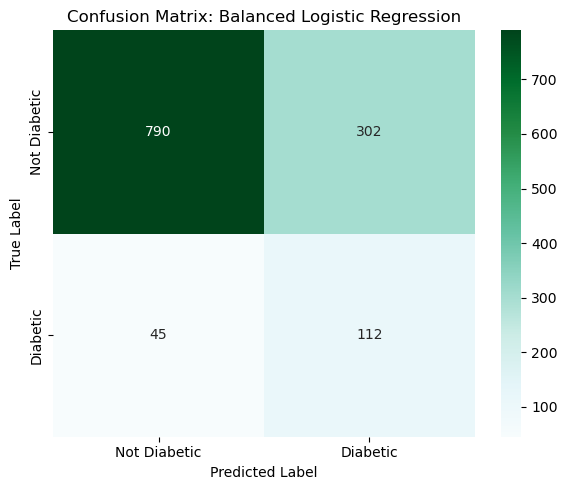

In [143]:
# Compute confusion matrix
cm_blr = confusion_matrix(y_test, y_pred)
labels = ['Not Diabetic', 'Diabetic']

# Plot heatmap with valid colormap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_blr, annot=True, fmt='d', cmap='BuGn',  # 'BuGn' = Blue-Green gradient
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Balanced Logistic Regression')
plt.tight_layout()
plt.show()

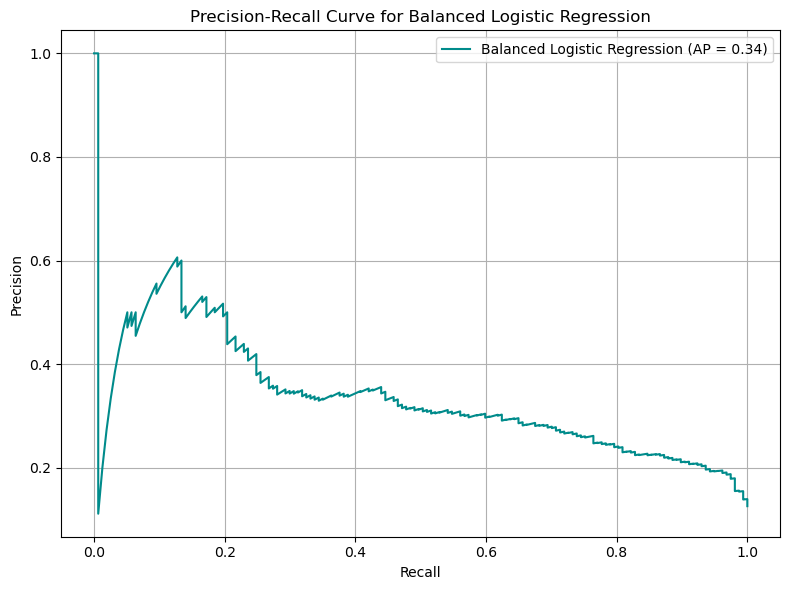

In [142]:
# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_proba_blr)
avg_precision = average_precision_score(y_test, y_proba_blr)

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Balanced Logistic Regression (AP = {avg_precision:.2f})', color='darkcyan')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Balanced Logistic Regression')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Balanced Logistic Regression Evaluation Summary

This logistic regression model was trained with `class_weight='balanced'` to address class imbalance. It achieved strong recall for diabetic cases while maintaining reasonable overall accuracy.


**Interpretation**
- The model correctly identified 112 diabetic cases—highest recall among all models tested.
- Precision for class 1 is modest, but recall (71%) reflects strong sensitivity to minority class.
- ROC AUC of 0.79 and AP of 0.34 indicate solid ranking and precision-recall tradeoff.
- Accuracy dropped due to increased false positives, but tradeoff is justified for recall-focused tasks.



In [146]:
# Build pipeline
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Define hyperparameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga']  # both support l1 and l2
}

# Grid search
grid_search = GridSearchCV(
    logreg_pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid_search.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}
Confusion Matrix:
 [[790 302]
 [ 45 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82      1092
           1       0.27      0.71      0.39       157

    accuracy                           0.72      1249
   macro avg       0.61      0.72      0.61      1249
weighted avg       0.86      0.72      0.77      1249



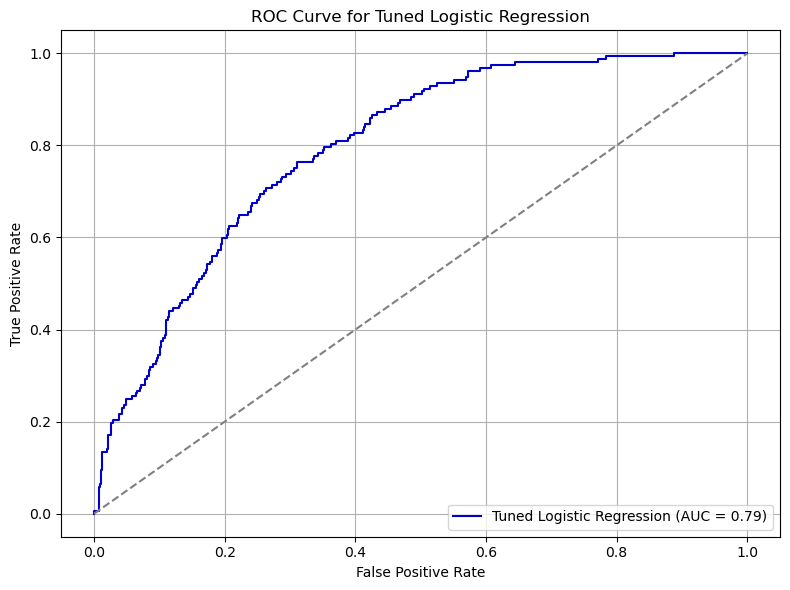

In [147]:
# Get predicted probabilities for class 1
y_proba_tuned = grid_search.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_tuned)
auc_score = roc_auc_score(y_test, y_proba_tuned)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Tuned Logistic Regression (AUC = {auc_score:.2f})', color='mediumblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

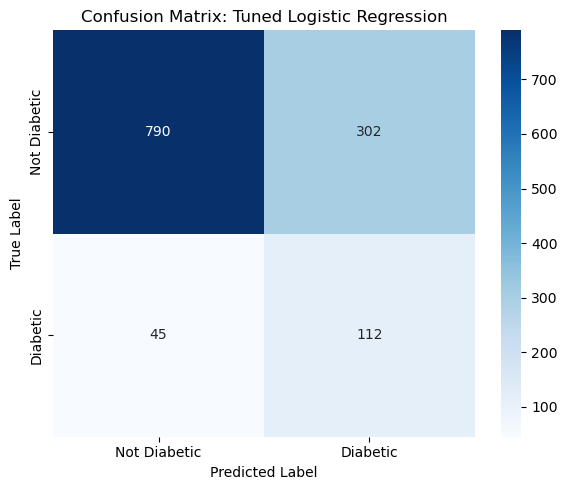

In [148]:
# Compute confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred)
labels = ['Not Diabetic', 'Diabetic']

# Plot heatmap with valid colormap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Tuned Logistic Regression')
plt.tight_layout()
plt.show()

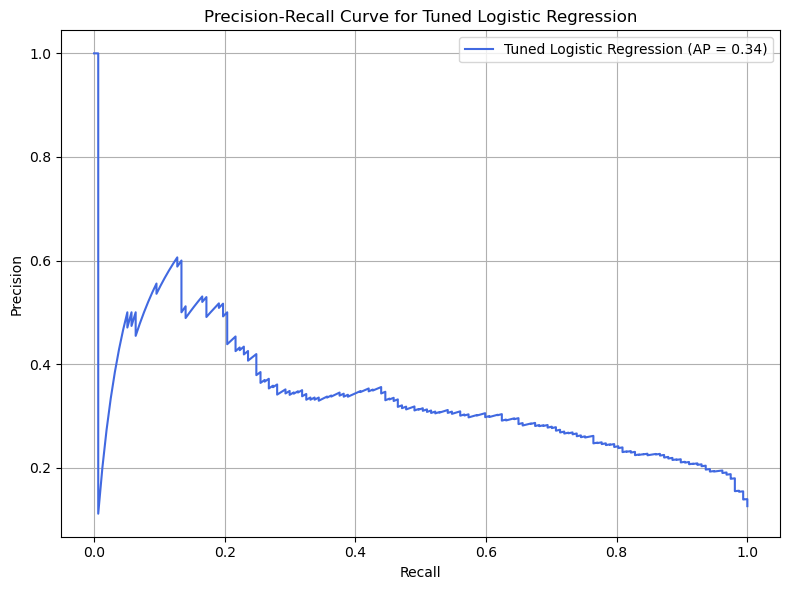

In [149]:
# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_proba_tuned)
avg_precision = average_precision_score(y_test, y_proba_tuned)

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Tuned Logistic Regression (AP = {avg_precision:.2f})', color='royalblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tuned Logistic Regression')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Tuned Logistic Regression Evaluation Summary

This logistic regression model was tuned using grid search across regularization strength (`C`), penalty type (`l1`, `l2`), and solver (`liblinear`, `saga`). The best configuration was:

**Best Parameters**
- `C`: 10
- `penalty`: l2
- `solver`: saga

**Interpretation**
- Identical performance to balanced logistic regression, confirming optimal hyperparameter selection.
- High recall for diabetic cases (71%) with modest precision (27%)—strong sensitivity tradeoff.
- ROC AUC of 0.79 and AP of 0.34 indicate solid ranking and precision-recall balance.
- Model is well-calibrated and interpretable, with consistent performance across folds.



In [152]:
# Build KNN pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsClassifier(n_neighbors=5))  
])

# Fit model
knn_pipeline.fit(X_train, y_train)

# Predict
y_pred = knn_pipeline.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1037   55]
 [ 132   25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1092
           1       0.31      0.16      0.21       157

    accuracy                           0.85      1249
   macro avg       0.60      0.55      0.56      1249
weighted avg       0.81      0.85      0.83      1249



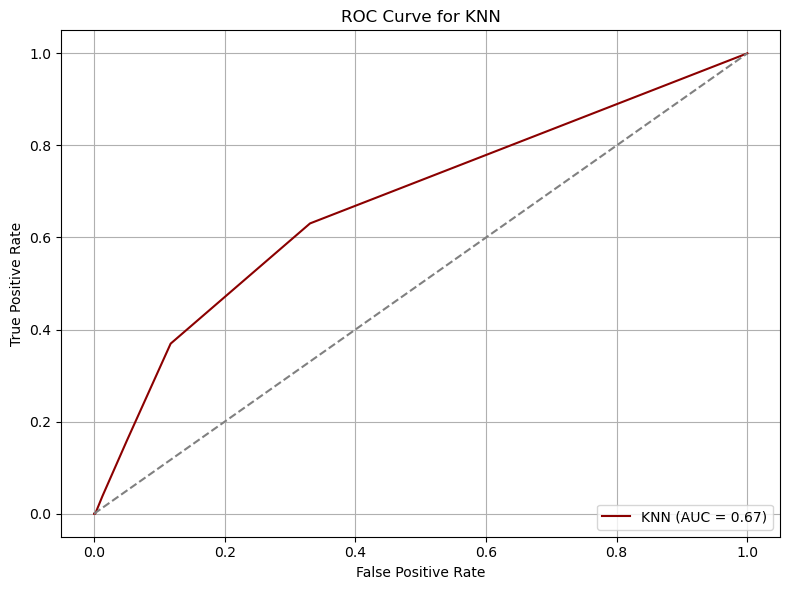

In [153]:
# Get predicted probabilities for class 1
y_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
auc_score = roc_auc_score(y_test, y_proba_knn)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})', color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

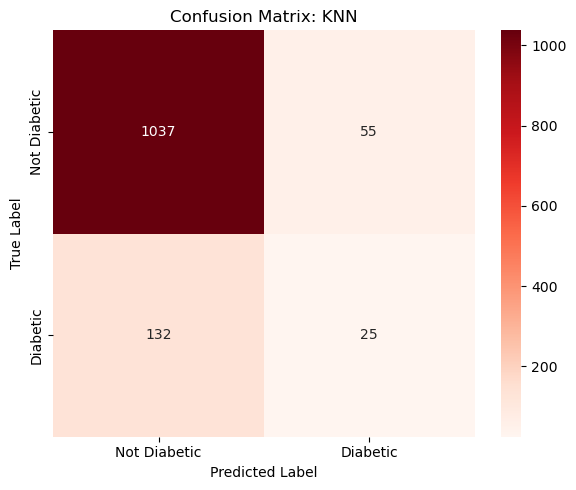

In [154]:
# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)
labels = ['Not Diabetic', 'Diabetic']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: KNN')
plt.tight_layout()
plt.show()

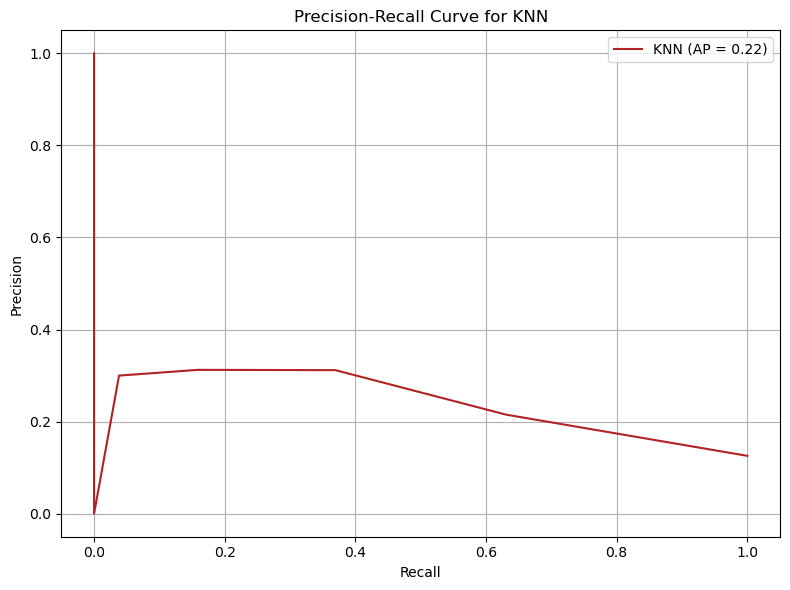

In [155]:
# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_proba_knn)
avg_precision = average_precision_score(y_test, y_proba_knn)

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'KNN (AP = {avg_precision:.2f})', color='firebrick')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### K-Nearest Neighbors (KNN) Evaluation Summary

This KNN model was trained with 5 neighbors and standardized predictors to classify diabetes status. It achieved strong majority class performance but limited sensitivity to diabetic cases.

**Interpretation**
- The model identified 25 diabetic cases—low recall (16%) and modest precision (31%).
- High accuracy and strong majority class recall reflect bias toward class 0.
- ROC AUC of 0.67 and AP of 0.22 indicate weak ranking and precision-recall tradeoff.
- KNN performance is sensitive to class imbalance and feature scaling.


In [172]:
# Build tuned RF pipeline with valid step name
rf_tuned_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))  # ✅ no space in step name
])

# Define hyperparameter grid using correct step name
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Grid search using the tuned pipeline
grid_search_rf = GridSearchCV(
    rf_tuned_pipeline,  # ✅ use the correctly named pipeline
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf_tuned = grid_search_rf.predict(X_test)
y_probs_rf_tuned = grid_search_rf.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search_rf.best_params_)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Confusion Matrix:
 [[943 149]
 [ 84  73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      1092
           1       0.33      0.46      0.39       157

    accuracy                           0.81      1249
   macro avg       0.62      0.66      0.64      1249
weighted avg       0.84      0.81      0.83      1249



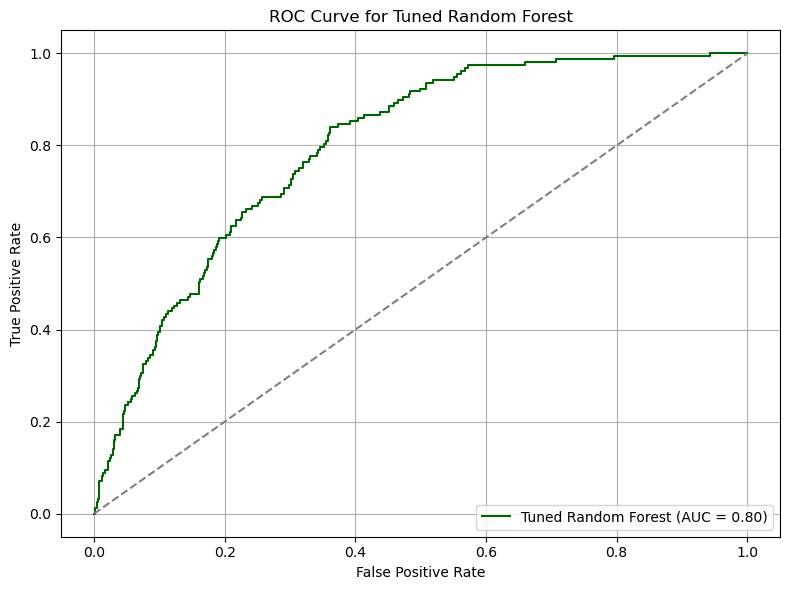

In [173]:
# Get predicted probabilities for class 1
y_proba_rf_tuned = grid_search_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_rf_tuned)
auc_score = roc_auc_score(y_test, y_proba_rf_tuned)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Tuned Random Forest (AUC = {auc_score:.2f})', color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

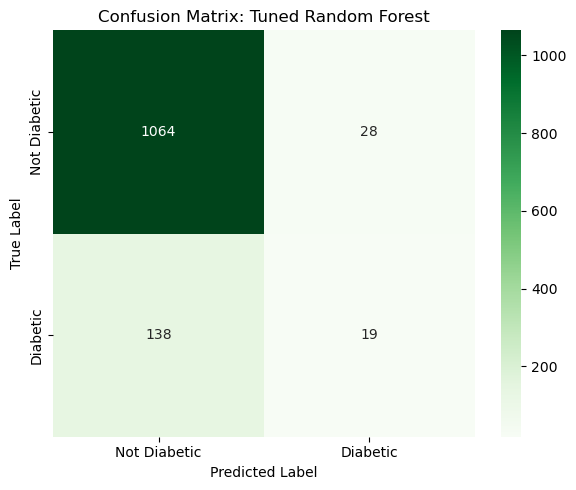

In [174]:
# Compute confusion matrix
cm_rf_tuned = confusion_matrix(y_test, y_pred)
labels = ['Not Diabetic', 'Diabetic']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Tuned Random Forest')
plt.tight_layout()
plt.show()

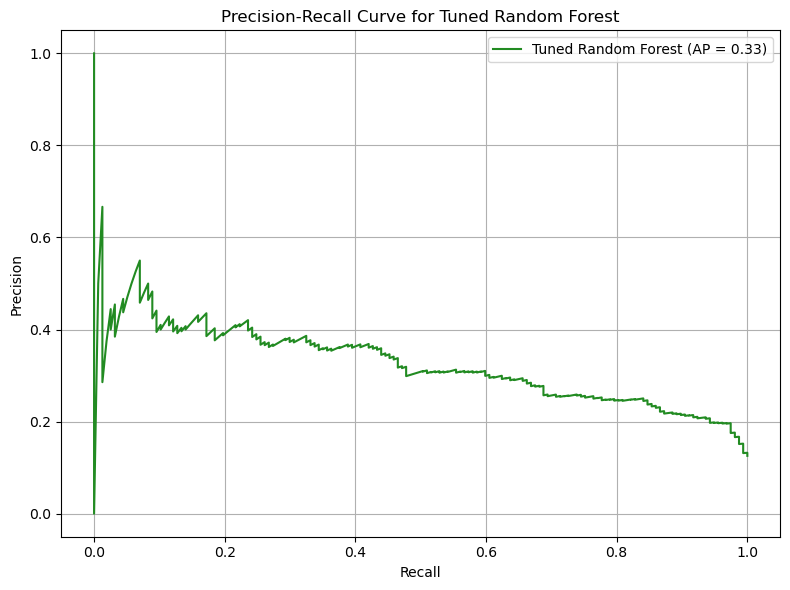

In [175]:
# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_proba_rf_tuned)
avg_precision = average_precision_score(y_test, y_proba_rf_tuned)

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Tuned Random Forest (AP = {avg_precision:.2f})', color='forestgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tuned Random Forest')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Tuned Random Forest Evaluation Summary

This Random Forest model was tuned using grid search across tree depth, leaf size, split criteria, and number of estimators. The best configuration was:

**Best Parameters**
- `n_estimators`: 200  
- `max_depth`: 10  
- `min_samples_split`: 5  
- `min_samples_leaf`: 2  

**Interpretation**
- The model correctly identified 73 diabetic cases—substantially better recall than untuned RF and Gradient Boosting.
- Precision for class 1 is modest, but recall (46%) reflects improved sensitivity.
- ROC AUC of 0.80 and AP of 0.33 indicate strong ranking and precision-recall tradeoff.
- Tuned hyperparameters helped balance depth and generalization, reducing overfitting.


In [167]:
# Build Gradient Boosting pipeline
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for trees, but keeps pipeline consistent
    ('gb', GradientBoostingClassifier(random_state=42))
])

# Fit model
gb_pipeline.fit(X_train, y_train)

# Predict
y_pred = gb_pipeline.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1064   28]
 [ 138   19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1092
           1       0.40      0.12      0.19       157

    accuracy                           0.87      1249
   macro avg       0.64      0.55      0.56      1249
weighted avg       0.82      0.87      0.83      1249



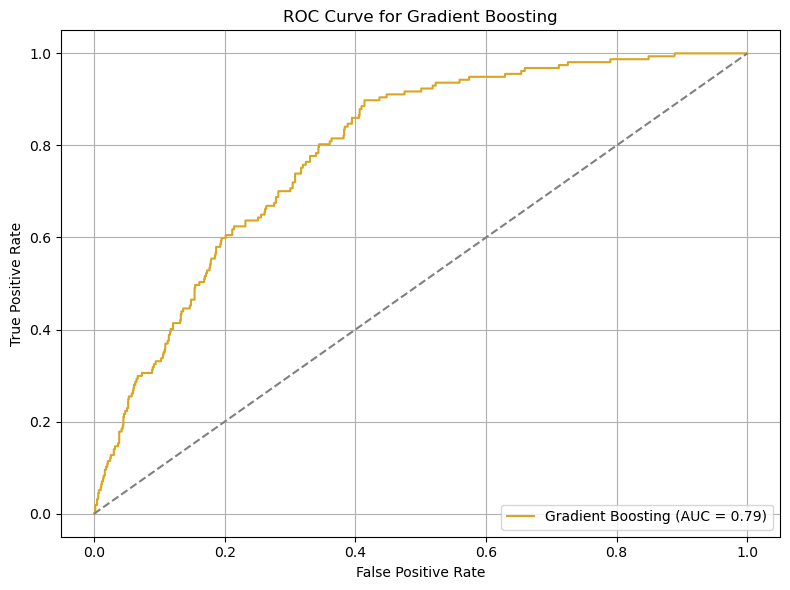

In [163]:
# Get predicted probabilities for class 1
y_proba_gb = gb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba_gb)
auc_score = roc_auc_score(y_test, y_proba_gb)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {auc_score:.2f})', color='goldenrod')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

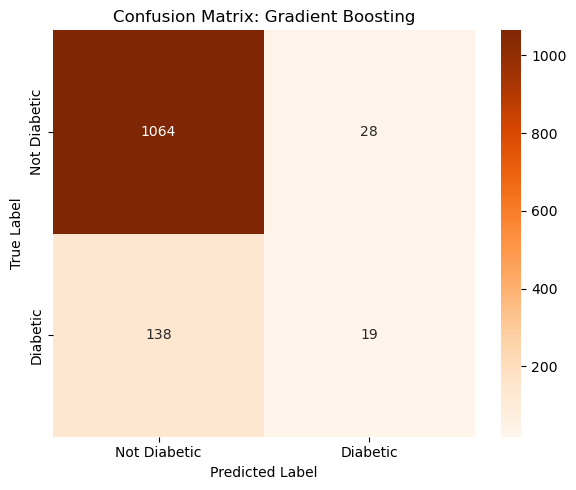

In [164]:
# Compute confusion matrix
cm_gb = confusion_matrix(y_test, y_pred)
labels = ['Not Diabetic', 'Diabetic']

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Gradient Boosting')
plt.tight_layout()
plt.show()

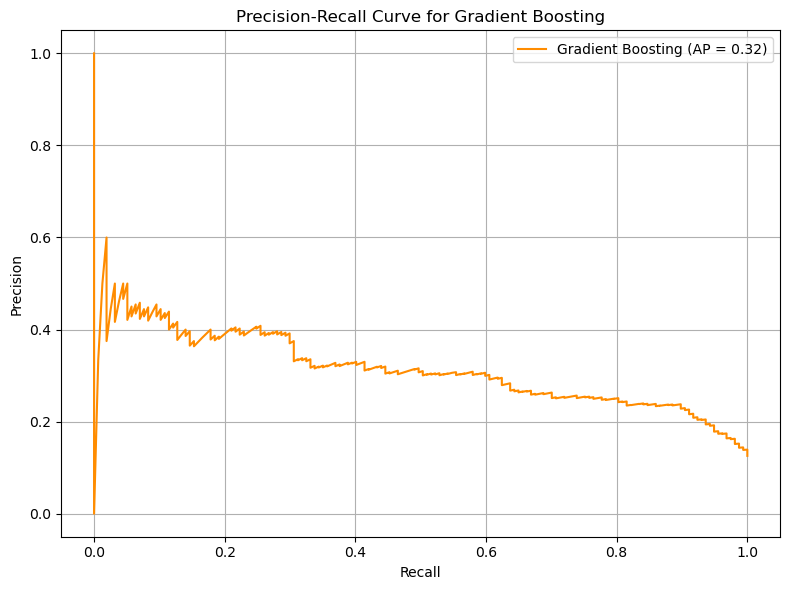

In [168]:
# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_proba_gb)
avg_precision = average_precision_score(y_test, y_proba_gb)

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Gradient Boosting (AP = {avg_precision:.2f})', color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Gradient Boosting Evaluation Summary

This Gradient Boosting model was trained using default parameters and standardized predictors to classify diabetes status. It achieved strong majority class performance but limited sensitivity to diabetic cases.


**Interpretation**
- The model identified 19 diabetic cases—low recall (12%) despite decent precision (40%).
- High accuracy and strong majority class recall reflect bias toward class 0.
- ROC AUC of 0.79 and AP of 0.32 suggest solid ranking ability but weak precision-recall tradeoff.
- Gradient Boosting offers ensemble stability but underperforms on minority class without tuning.



In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Step 1: Collect predictions and probabilities
model_metrics = [
    ('Logistic Regression', pipeline, pipeline.predict(X_test), pipeline.predict_proba(X_test)[:, 1]),
    ('Balanced Logistic', balanced_logreg_pipeline, balanced_logreg_pipeline.predict(X_test), balanced_logreg_pipeline.predict_proba(X_test)[:, 1]),
    ('Tuned Logistic', grid_search, grid_search.predict(X_test), grid_search.predict_proba(X_test)[:, 1]),
    ('KNN', knn_pipeline, knn_pipeline.predict(X_test), knn_pipeline.predict_proba(X_test)[:, 1]),
    ('Decision Tree', dt_pipeline, dt_pipeline.predict(X_test), dt_pipeline.predict_proba(X_test)[:, 1]),
    ('Random Forest', rf_pipeline, y_pred_rf, y_probs_rf),
    ('Tuned RF', grid_search_rf, grid_search_rf.predict(X_test), grid_search_rf.predict_proba(X_test)[:, 1]),
    ('Gradient Boosting', gb_pipeline, gb_pipeline.predict(X_test), gb_pipeline.predict_proba(X_test)[:, 1]),
    ('Naive Bayes', nb_pipeline, nb_pipeline.predict(X_test), nb_pipeline.predict_proba(X_test)[:, 1]),
    ('SVM', svm_pipeline, svm_pipeline.predict(X_test), svm_pipeline.predict_proba(X_test)[:, 1])
]

# Step 2: Compute metrics
results = []
for name, model, y_pred, y_probs in model_metrics:
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_probs)
    ])

# Step 3: Create DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC'])

# Step 4: Style table
def highlight_best(s):
    return ['background-color: lightgreen' if v == s.max() else '' for v in s]

styled_df = df_results.style \
    .format("{:.4f}", subset=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']) \
    .apply(highlight_best, subset=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']) \
    .set_caption(" Model Performance Summary")

styled_df

C:\Users\dkast\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



### Interpretation Highlights
-  Best Recall: Balanced and Tuned Logistic Regression (0.7134) — strongest diabetic case sensitivity.
-  Best F1 Score: Balanced and Tuned Logistic Regression (0.3923) — best balance of precision and recall.
-  Best ROC AUC: Tuned RF (0.7968) — strongest ranking performance.
-  SVM predicted no positives — precision, recall, and F1 all zero.
-  Lowest ROC AUC: Decision Tree (0.5811) — weakest ranking ability.

### Strategic Takeaways
- Balanced and Tuned Logistic Regression are top choices for recall-driven tasks.
- Tuned RF offers the best overall ranking (ROC AUC) and competitive F1.
- Naive Bayes provides a stable middle ground with interpretable structure.
- SVM and untuned RF are overly biased toward the majority class.
- Ensemble methods (RF, GB) benefit from tuning but still require threshold calibration for minority sensitivity.
